<a href="https://colab.research.google.com/github/SamanMansoor/Data-Science/blob/main/Stress_Data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
import os

In [ ]:
!pip install pyreadstat

# **Load Data**

In [ ]:
import pyreadstat

# Specify the path to your .sav file
file_path = '/content/Stress.sav'

# Load the .sav file
data, meta = pyreadstat.read_sav(file_path)

# Access the data and metadata information
print("Data:")
print(data.head())  # Assuming you want to print the first few rows of the data
print("Metadata:")
print(meta)


Data:
   Gender  AreaLiving  Ageinyears  Province  WeightKG  HeightFeet  Heightm  \
0     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
1     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
2     2.0         1.0        18.0       1.0      55.0         5.0   1.5240   
3     1.0         1.0        18.0       1.0     120.0         6.0   1.8288   
4     1.0         1.0        18.0       1.0      99.0         5.5   1.6764   

         BMI  No.ofsiblingsTotalnumberofsistersampBrothers  \
0  23.680603                                           0.0   
1  23.680603                                           0.0   
2  23.680603                                           0.0   
3  35.879701                                           0.0   
4  35.227343                                           0.0   

   YourHighestQualification  ...   Burnout       SFS       MIS       SIS  \
0                       2.0  ...  0.256748 -0.145994  0.783488  0.284563   


In [ ]:
#All info about data
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11401 entries, 0 to 11400
Columns: 148 entries, Gender to TS
dtypes: float64(148)
memory usage: 12.9 MB
None


In [ ]:
#Summary Statistic
print(data.describe())

             Gender    AreaLiving    Ageinyears      Province      WeightKG  \
count  11385.000000  11401.000000  11401.000000  11168.000000  11401.000000   
mean       1.601405      1.223489     22.317867      1.311784     61.680028   
std        5.222502      0.416602      6.936049      0.942626     12.745645   
min        1.000000      1.000000     10.000000      1.000000     30.000000   
25%        1.000000      1.000000     19.000000      1.000000     52.000000   
50%        2.000000      1.000000     20.000000      1.000000     60.000000   
75%        2.000000      1.000000     23.000000      1.000000     70.000000   
max      556.000000      2.000000     87.000000      6.000000    140.000000   

         HeightFeet       Heightm           BMI  \
count  11401.000000  11401.000000  11401.000000   
mean       5.477270      1.669473     21.858801   
std        0.389407      0.118691      1.814952   
min        3.900000      1.188720     15.300765   
25%        5.200000      1.584960

In [ ]:
print(data.shape)

(11401, 148)


In [ ]:
data.isnull()

,Gender,AreaLiving,Ageinyears,Province,WeightKG,HeightFeet,Heightm,BMI,No.ofsiblingsTotalnumberofsistersampBrothers,YourHighestQualification,...,Burnout,SFS,MIS,SIS,TMS,PS,GSS,TeS,RS,TS
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11396,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11397,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11398,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11399,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Gender         16
AreaLiving      0
Ageinyears      0
Province      233
WeightKG        0
             ... 
PS              0
GSS             0
TeS             0
RS              0
TS              0
Length: 148, dtype: int64

<Axes: >

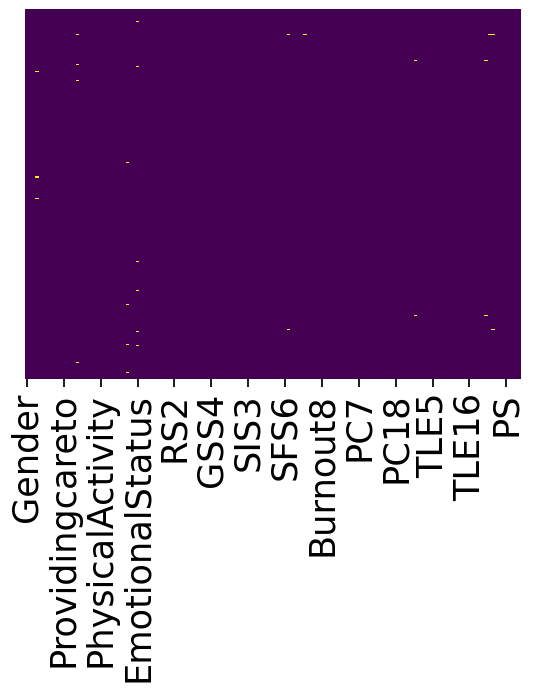

In [ ]:
# Heatmap to check missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Drop the NUll Values.
data.dropna()

,Gender,AreaLiving,Ageinyears,Province,WeightKG,HeightFeet,Heightm,BMI,No.ofsiblingsTotalnumberofsistersampBrothers,YourHighestQualification,...,Burnout,SFS,MIS,SIS,TMS,PS,GSS,TeS,RS,TS
0,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,2.0,...,0.256748,-0.145994,0.783488,0.284563,0.564496,-0.125628,0.208038,0.874855,0.014979,-0.021860
1,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,1.0,...,0.655349,0.527734,1.182439,1.001435,0.564496,0.539846,1.305324,0.861142,1.470899,0.458568
2,2.0,1.0,18.0,1.0,55.0,5.0,1.52400,23.680603,0.0,3.0,...,-1.243747,-0.395644,-0.858351,-1.128449,-1.120543,-0.915767,-0.765125,-0.792516,-0.790512,-0.865622
3,1.0,1.0,18.0,1.0,120.0,6.0,1.82880,35.879701,0.0,1.0,...,2.426962,2.066089,-0.248795,-2.193390,-2.098209,-1.526689,-1.767377,-1.535098,-1.782991,-2.243074
4,1.0,1.0,18.0,1.0,99.0,5.5,1.67640,35.227343,0.0,3.0,...,-0.409561,1.260472,-1.878746,-1.938331,-2.098209,-2.184188,-2.280591,-1.871443,-1.921218,-2.222361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11395,1.0,1.0,80.0,1.0,135.0,6.1,1.85928,39.052080,6.0,1.0,...,-0.523027,0.160180,-0.584555,-0.134539,0.127416,0.053590,0.794018,0.018299,1.111339,0.659702
11396,2.0,2.0,80.0,1.0,100.0,5.2,1.58496,39.807361,6.0,1.0,...,0.038640,-0.008531,-0.091400,-0.644658,-0.579957,-0.283135,0.081783,1.112090,0.478420,0.711596
11397,2.0,1.0,82.0,1.0,88.0,6.2,1.88976,24.641626,7.0,2.0,...,1.604457,0.774097,1.182439,1.001435,0.834789,0.993261,1.011269,1.365339,1.470899,0.675428
11398,2.0,1.0,85.0,1.0,54.0,4.0,1.21920,36.328198,7.0,1.0,...,0.191787,0.043037,0.162044,-0.631494,-0.142877,0.148568,0.583020,0.064040,0.831249,-0.214867


In [ ]:
#Remove Null Values
data=data.fillna('0')

In [ ]:
data.isnull().sum()

Gender        0
AreaLiving    0
Ageinyears    0
Province      0
WeightKG      0
             ..
PS            0
GSS           0
TeS           0
RS            0
TS            0
Length: 148, dtype: int64

<Axes: >

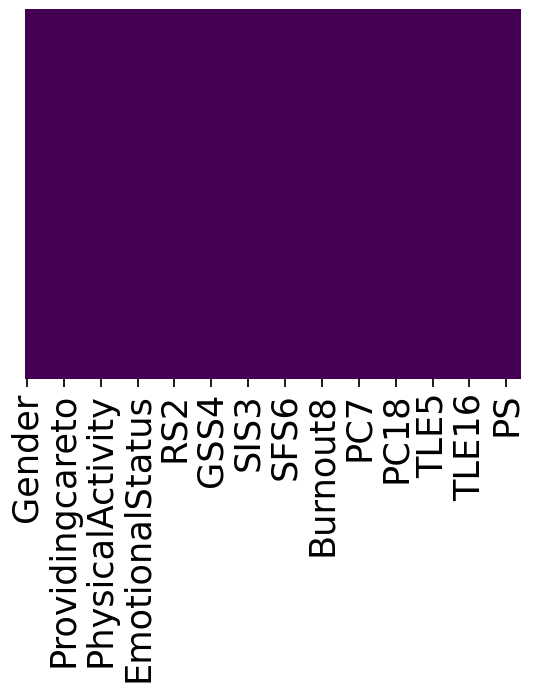

In [ ]:
# Heatmap to check missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
data.dtypes

Gender         object
AreaLiving    float64
Ageinyears    float64
Province       object
WeightKG      float64
               ...   
PS            float64
GSS           float64
TeS           float64
RS            float64
TS            float64
Length: 148, dtype: object

In [ ]:
import pandas as pd

# Specify the column names of the features you want to select
selected_features = ['TLE', 'PC', 'Burnout', 'SFS', 'MIS', 'SIS', 'TMS', 'PS', 'GSS', 'TeS', 'RS', 'TS', 'FamilyBPhistory', 'Familyhistoryofhypertension', 'Doyouthinkthatyouarelivingahealthylife', 'Howoftendoyouhavetroublefallingasleeporstayingasleep', 'EmotionalStatus']

# Select the desired features from the DataFrame
Final_data = data[selected_features]

# Define the new names for the selected features
new_feature_names = ['TLE', 'PC', 'Burnout', 'SFS', 'MIS', 'SIS', 'TMS', 'PS', 'GSS', 'TeS', 'RS', 'TS', 'F_BP', 'F_hypertension', 'healthylife','stay_sleep', 'EmotionalStatus']

# Rename the selected features in the DataFrame
Final_data.columns = new_feature_names

# Print the selected data with the renamed features
print(Final_data.head())


        TLE        PC   Burnout       SFS       MIS       SIS       TMS  \
0 -0.494186 -1.441012  0.256748 -0.145994  0.783488  0.284563  0.564496   
1  0.106513 -0.157086  0.655349  0.527734  1.182439  1.001435  0.564496   
2  0.584385  0.601437 -1.243747 -0.395644 -0.858351 -1.128449 -1.120543   
3  1.619023  2.664655  2.426962  2.066089 -0.248795 -2.193390 -2.098209   
4  1.174131  1.376269 -0.409561  1.260472 -1.878746 -1.938331 -2.098209   

         PS       GSS       TeS        RS        TS  F_BP  F_hypertension  \
0 -0.125628  0.208038  0.874855  0.014979 -0.021860   1.0             1.0   
1  0.539846  1.305324  0.861142  1.470899  0.458568   1.0             1.0   
2 -0.915767 -0.765125 -0.792516 -0.790512 -0.865622   2.0             2.0   
3 -1.526689 -1.767377 -1.535098 -1.782991 -2.243074   2.0             2.0   
4 -2.184188 -2.280591 -1.871443 -1.921218 -2.222361   1.0             1.0   

   healthylife  stay_sleep EmotionalStatus  
0          3.0         2.0             3.

In [ ]:
Final_data.shape

(11401, 17)

In [ ]:
Final_data.dtypes

TLE                 object
PC                  object
Burnout             object
SFS                 object
MIS                float64
SIS                float64
TMS                float64
PS                 float64
GSS                float64
TeS                float64
RS                 float64
TS                 float64
F_BP               float64
F_hypertension     float64
healthylife        float64
stay_sleep         float64
EmotionalStatus     object
dtype: object

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'data' with columns of type 'object'
# Assuming you want to change the data type of certain columns

# Create a new DataFrame to store the modified data
modified_data = Final_data.copy()

# List of columns to change the data type
columns_to_change =  ['TLE', 'PC', 'Burnout', 'SFS', 'MIS', 'SIS', 'TMS', 'PS', 'GSS', 'TeS', 'RS', 'TS', 'F_BP', 'F_hypertension', 'healthylife','stay_sleep', 'EmotionalStatus']


# Change the data type of the selected columns to the desired type
desired_type = object  # Change to the desired data type (e.g., int, float)
modified_data[columns_to_change] = modified_data[columns_to_change].astype(int)

# The 'modified_data' DataFrame now contains the updated data types
print(modified_data.head())


   TLE  PC  Burnout  SFS  MIS  SIS  TMS  PS  GSS  TeS  RS  TS  F_BP  \
0    0  -1        0    0    0    0    0   0    0    0   0   0     1   
1    0   0        0    0    1    1    0   0    1    0   1   0     1   
2    0   0       -1    0    0   -1   -1   0    0    0   0   0     2   
3    1   2        2    2    0   -2   -2  -1   -1   -1  -1  -2     2   
4    1   1        0    1   -1   -1   -2  -2   -2   -1  -1  -2     1   

   F_hypertension  healthylife  stay_sleep  EmotionalStatus  
0               1            3           2                3  
1               1            1           2                2  
2               2            1           2                1  
3               2            2           4                4  
4               1            1           2                2  


**This is a classification problem it would be important and interesting to the distribution of target variables for the data.**

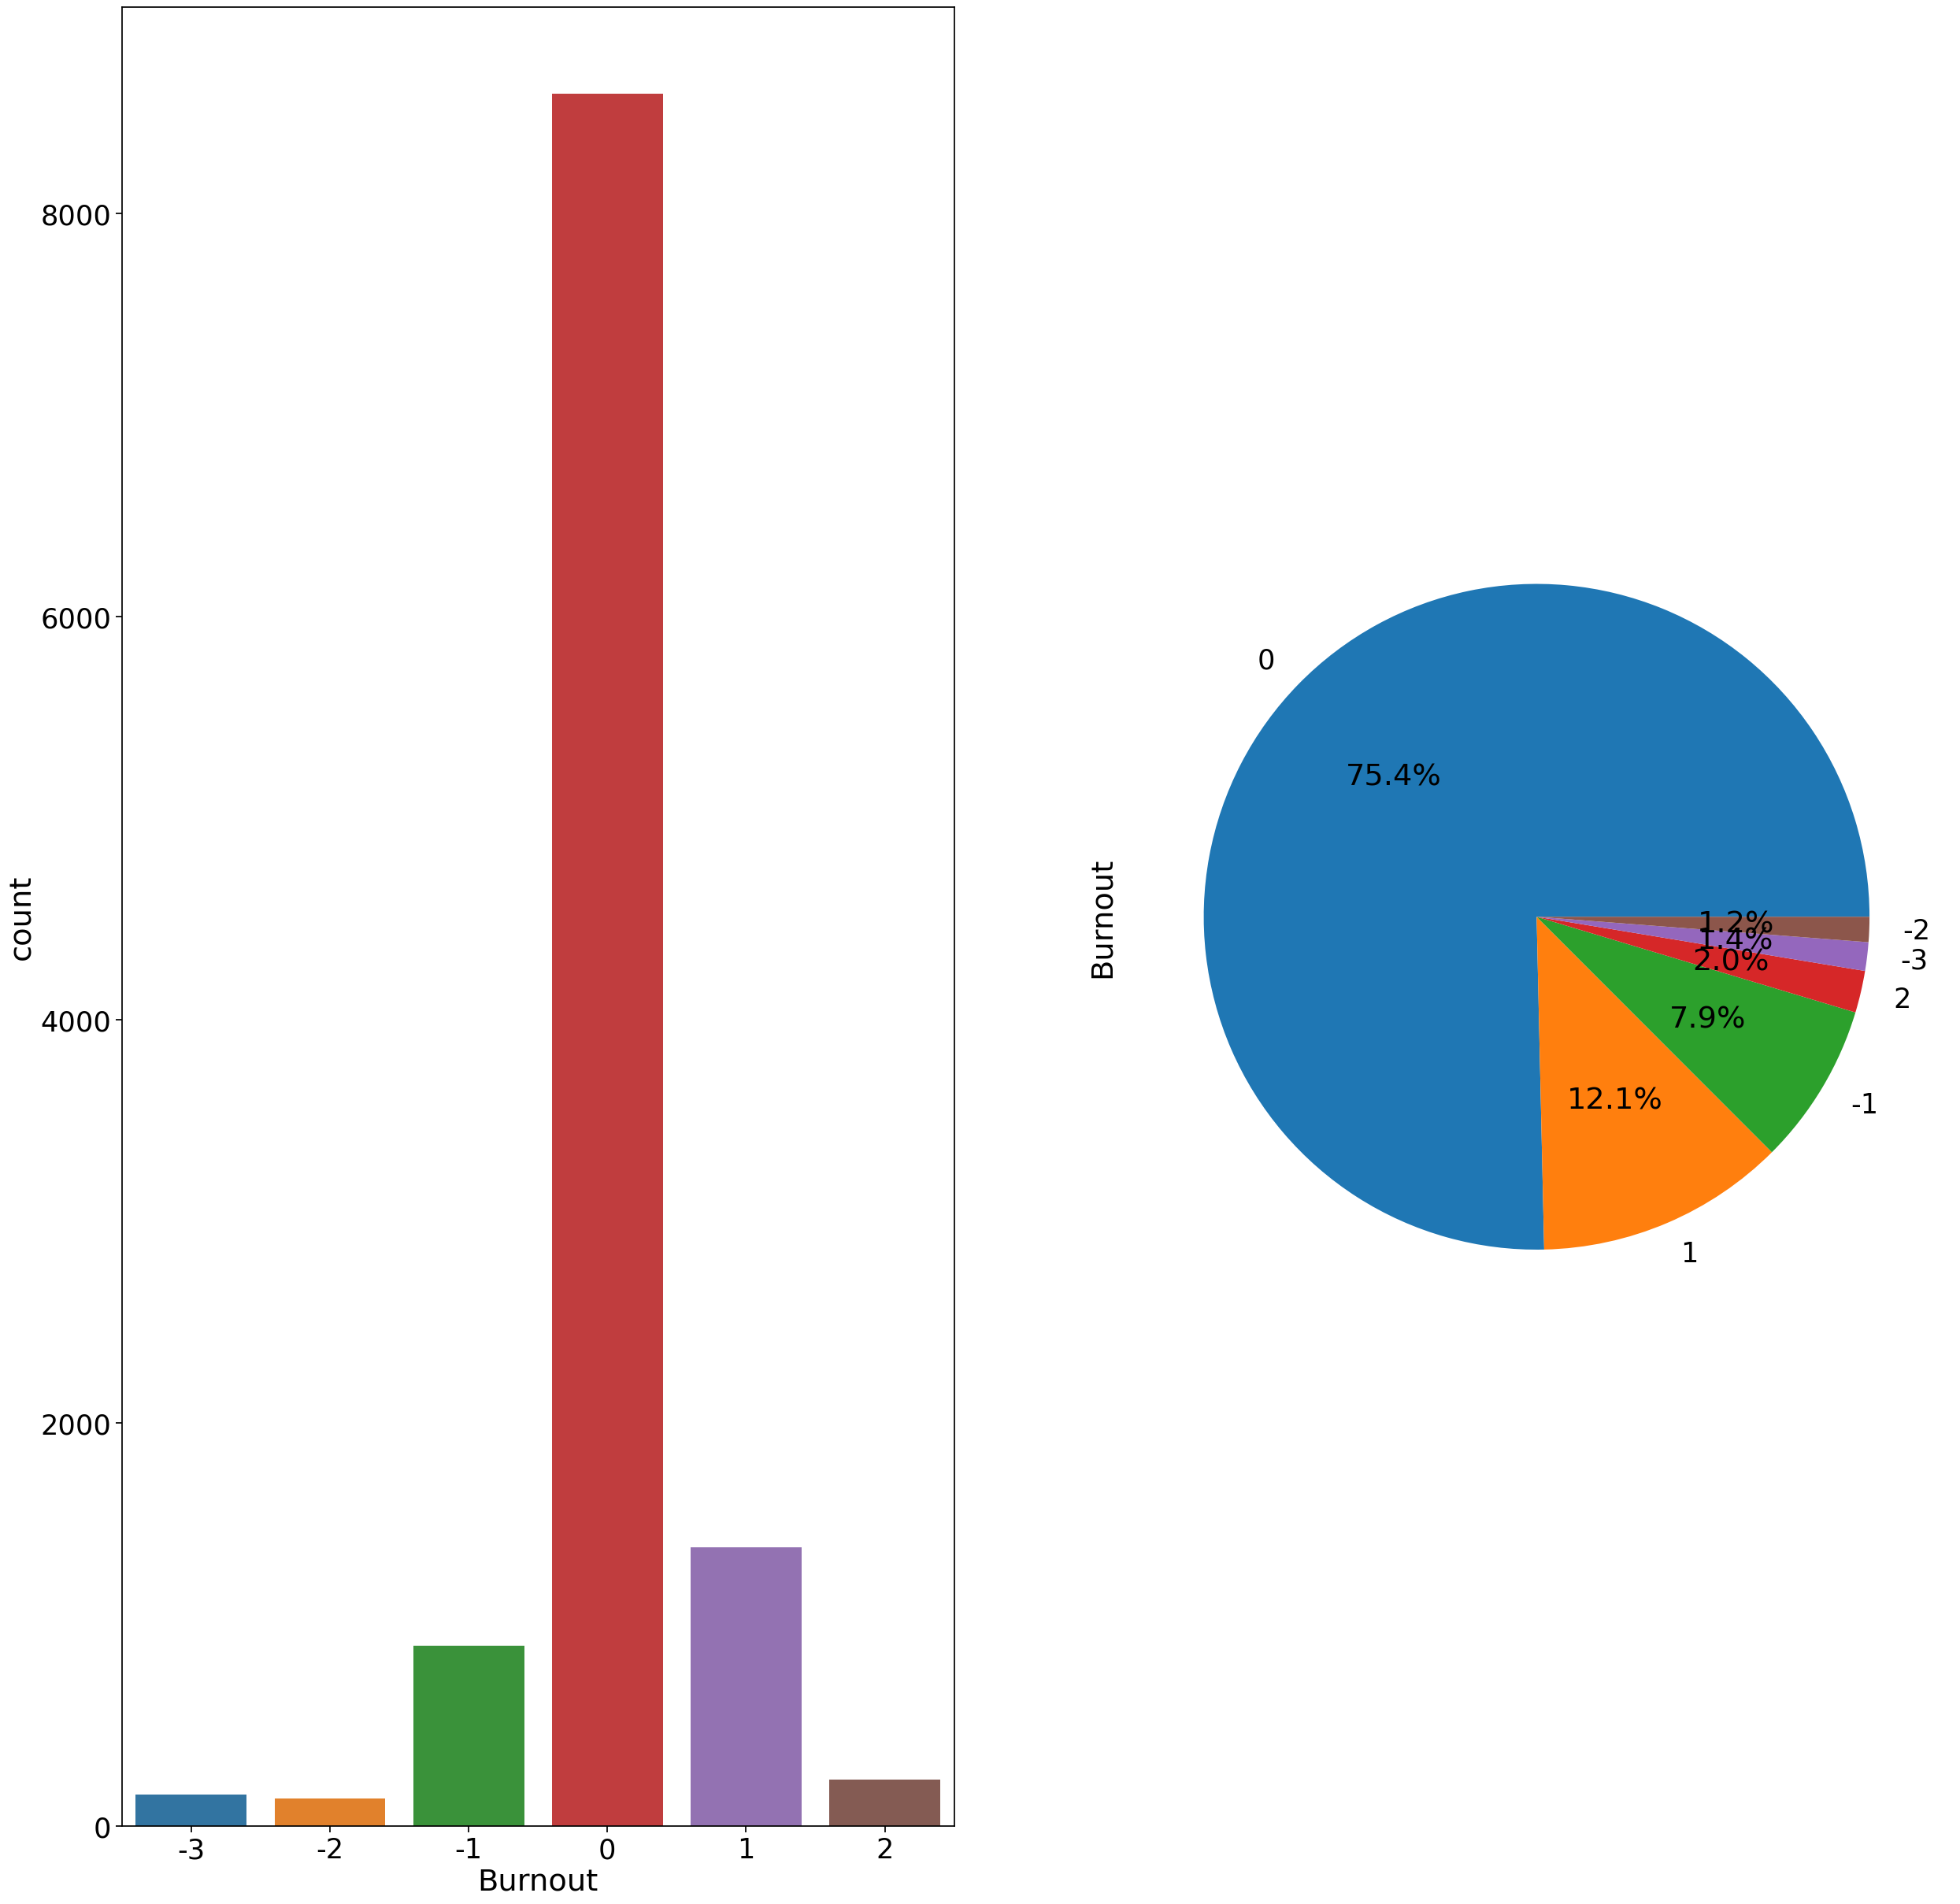

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(30,30))
_ = sns.countplot(x='Burnout', data=modified_data, ax=ax[0])
_ = modified_data['Burnout'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

**Let's check the distribution of data using Histogram and Density visualisation method**

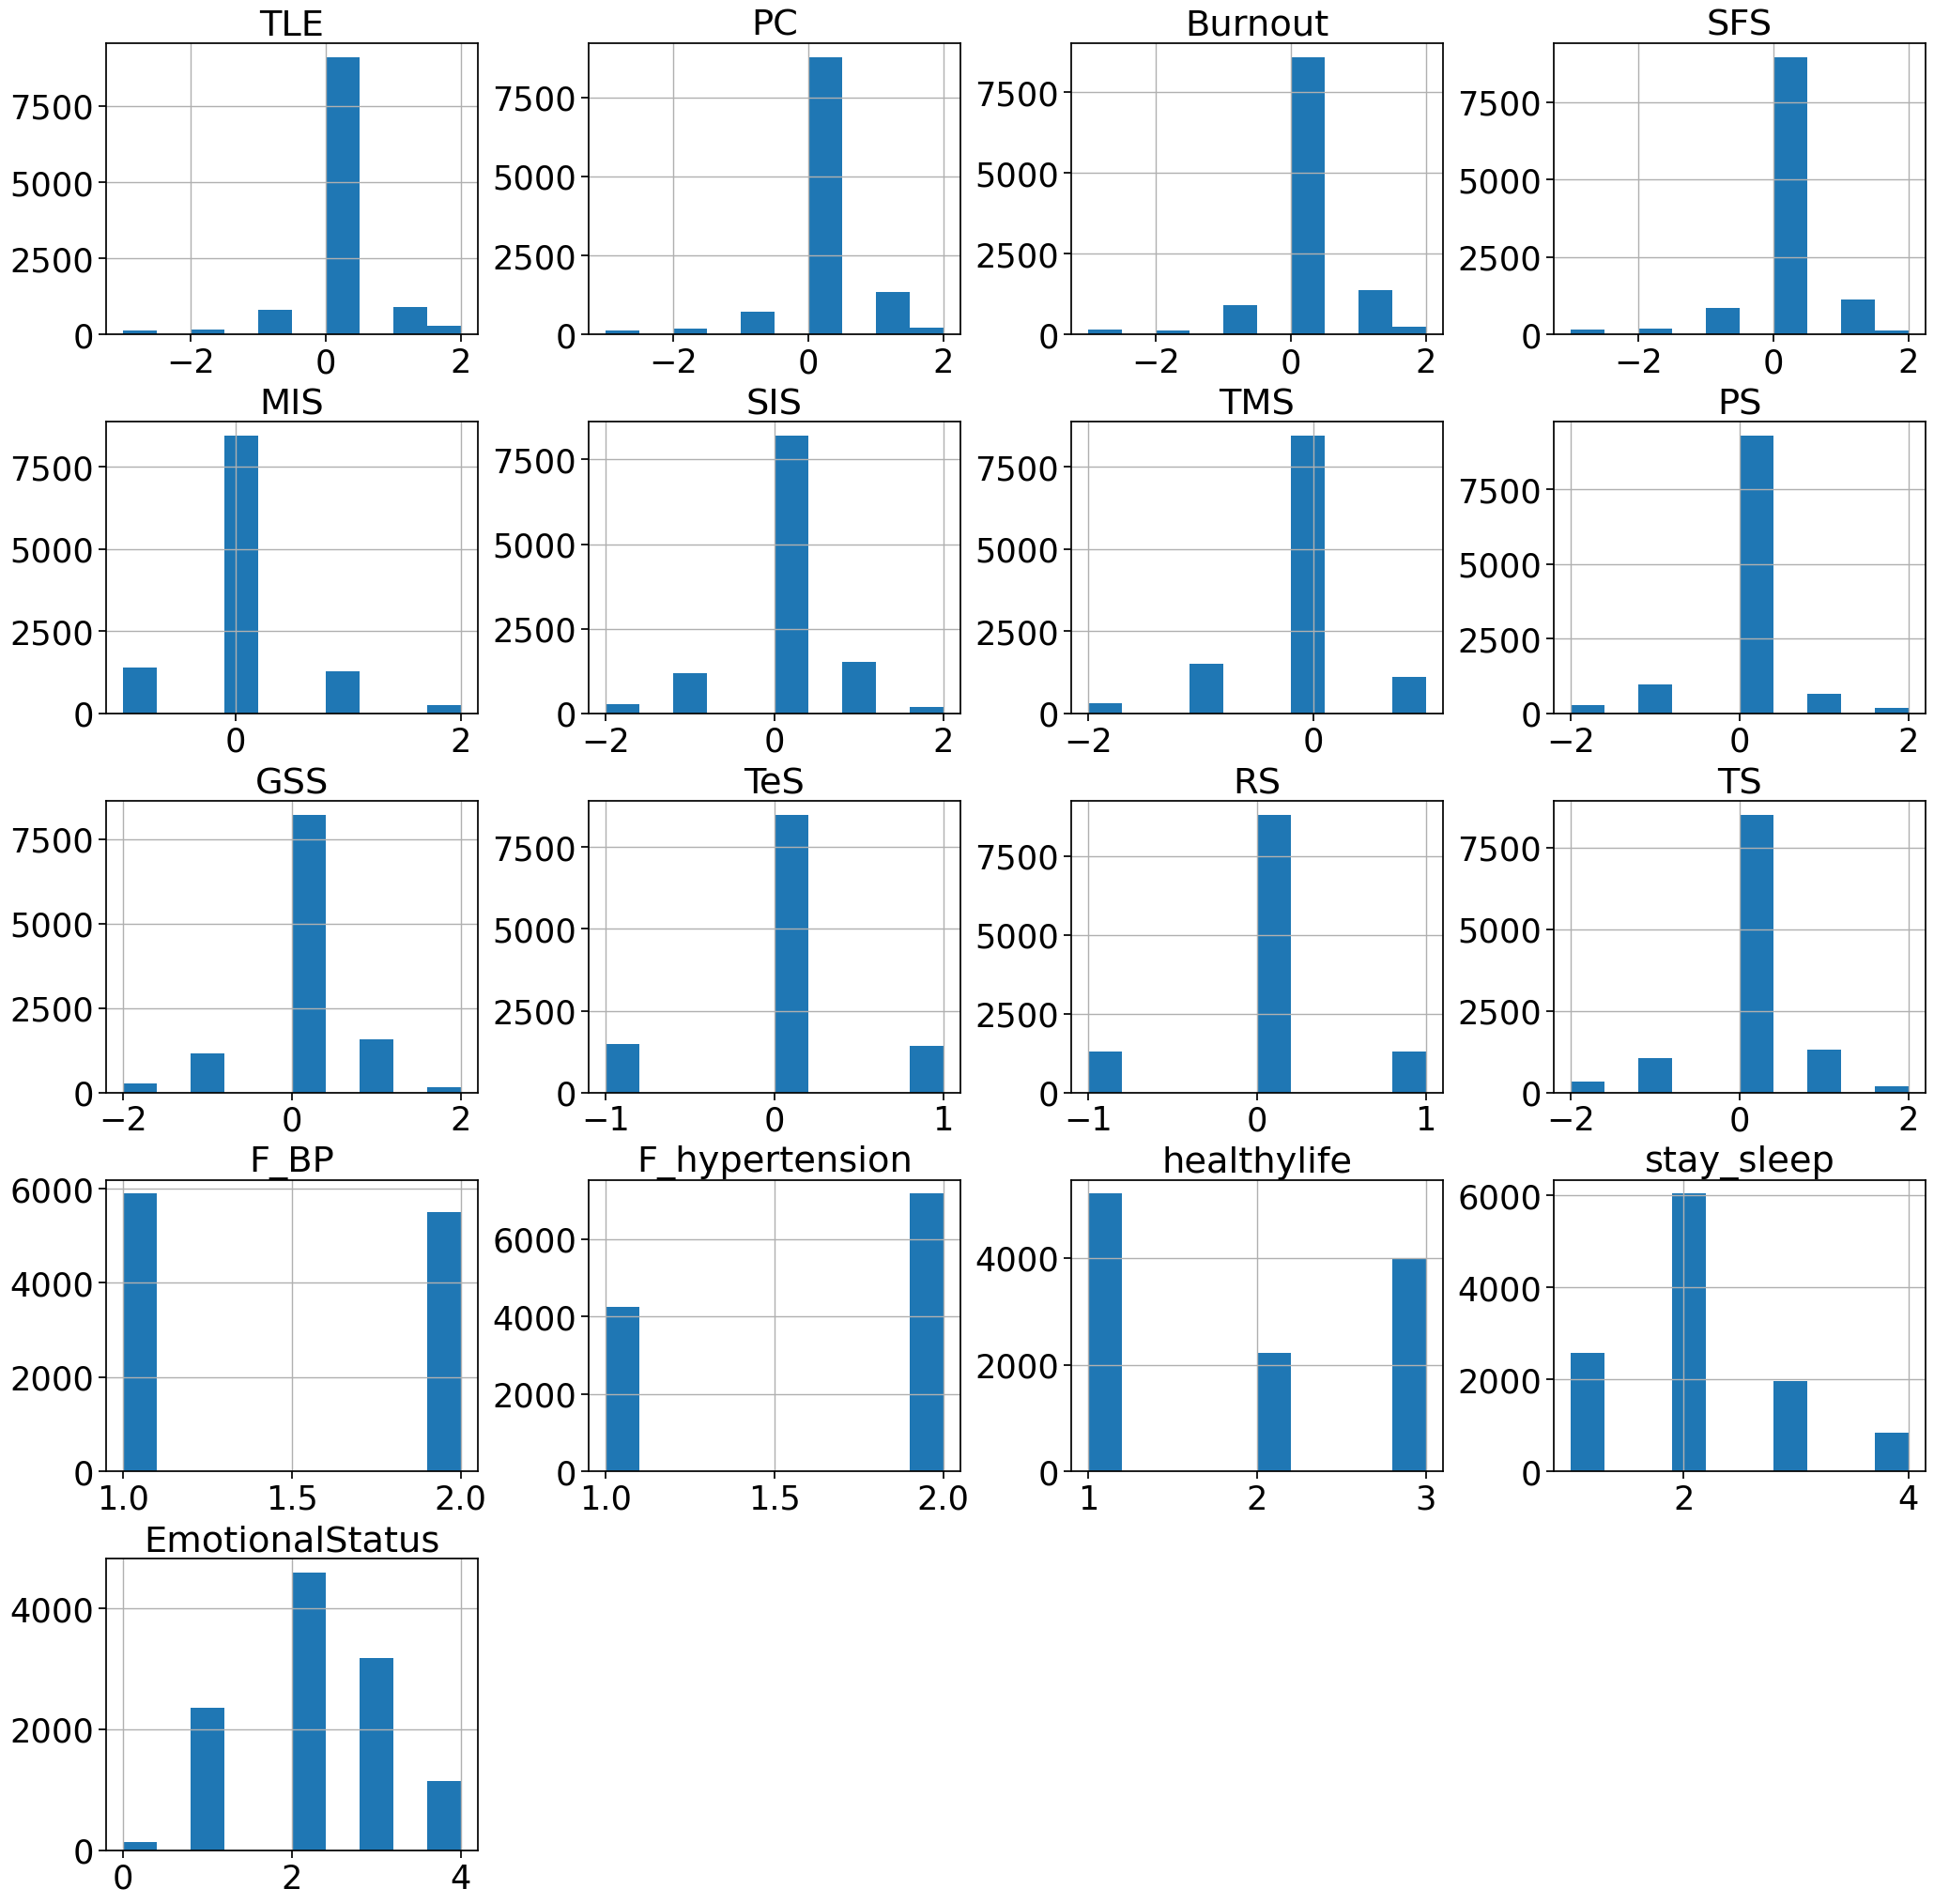

In [ ]:
modified_data.hist(figsize=(25,25))
plt.show()

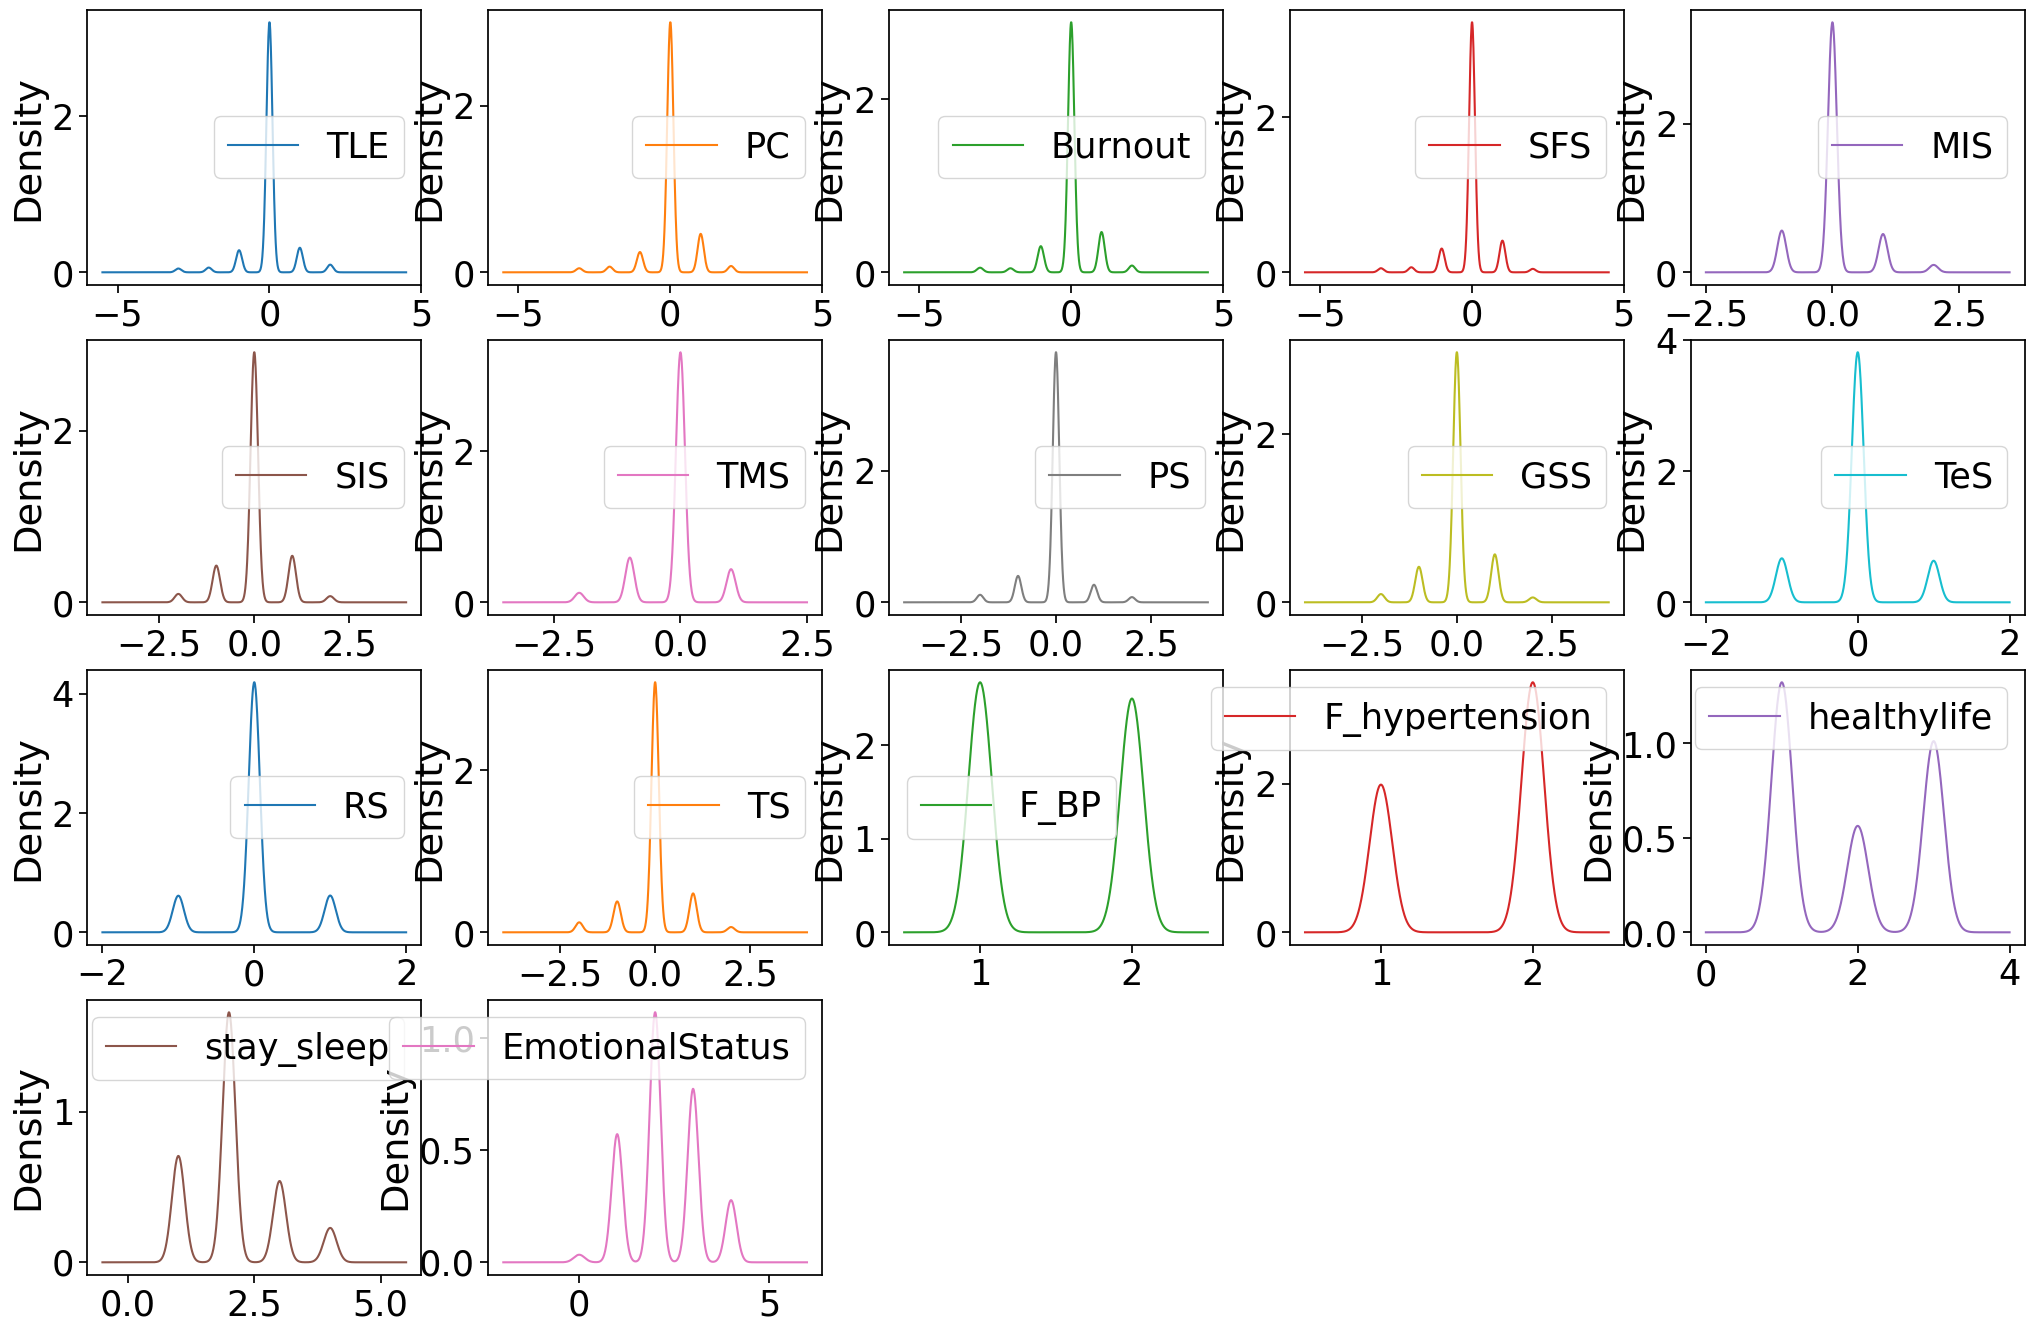

In [ ]:
modified_data.plot(kind="density", layout=(6,5),
             subplots=True,sharex=False, sharey=False, figsize=(25,25))
plt.show()

# **Check the correlation between various features.**


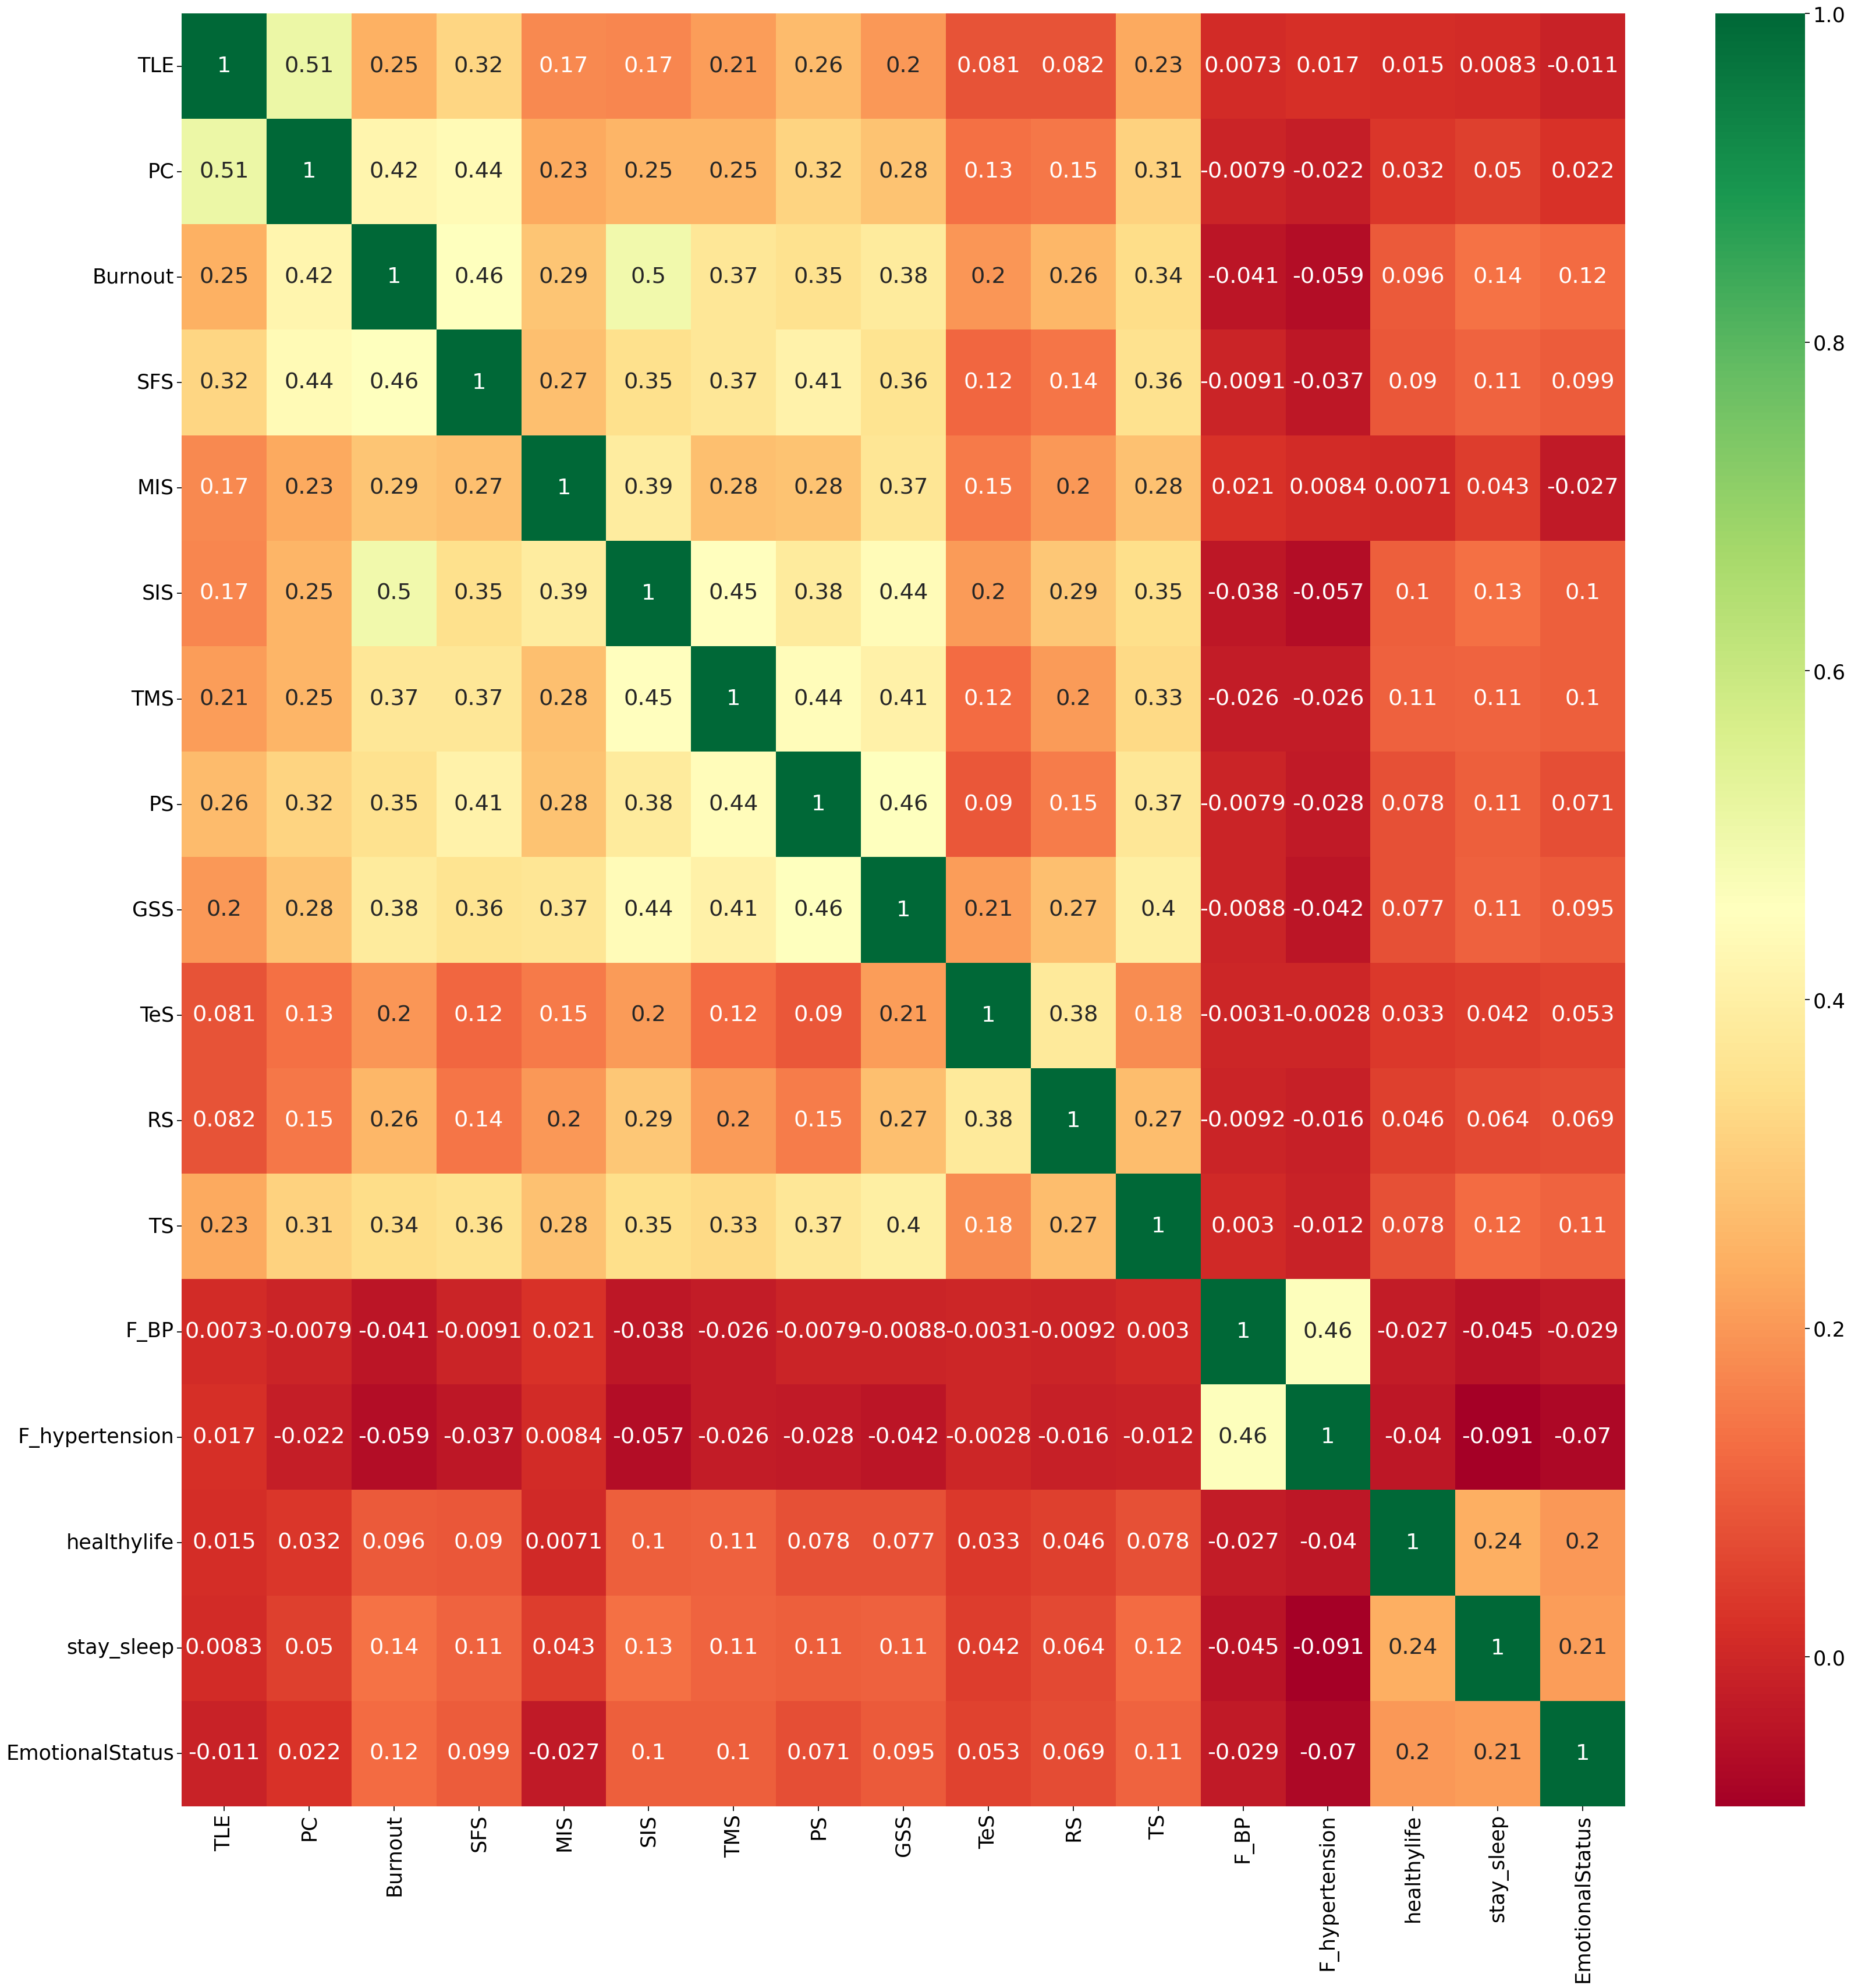

In [ ]:
import seaborn as sns
corrmat = modified_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(modified_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()

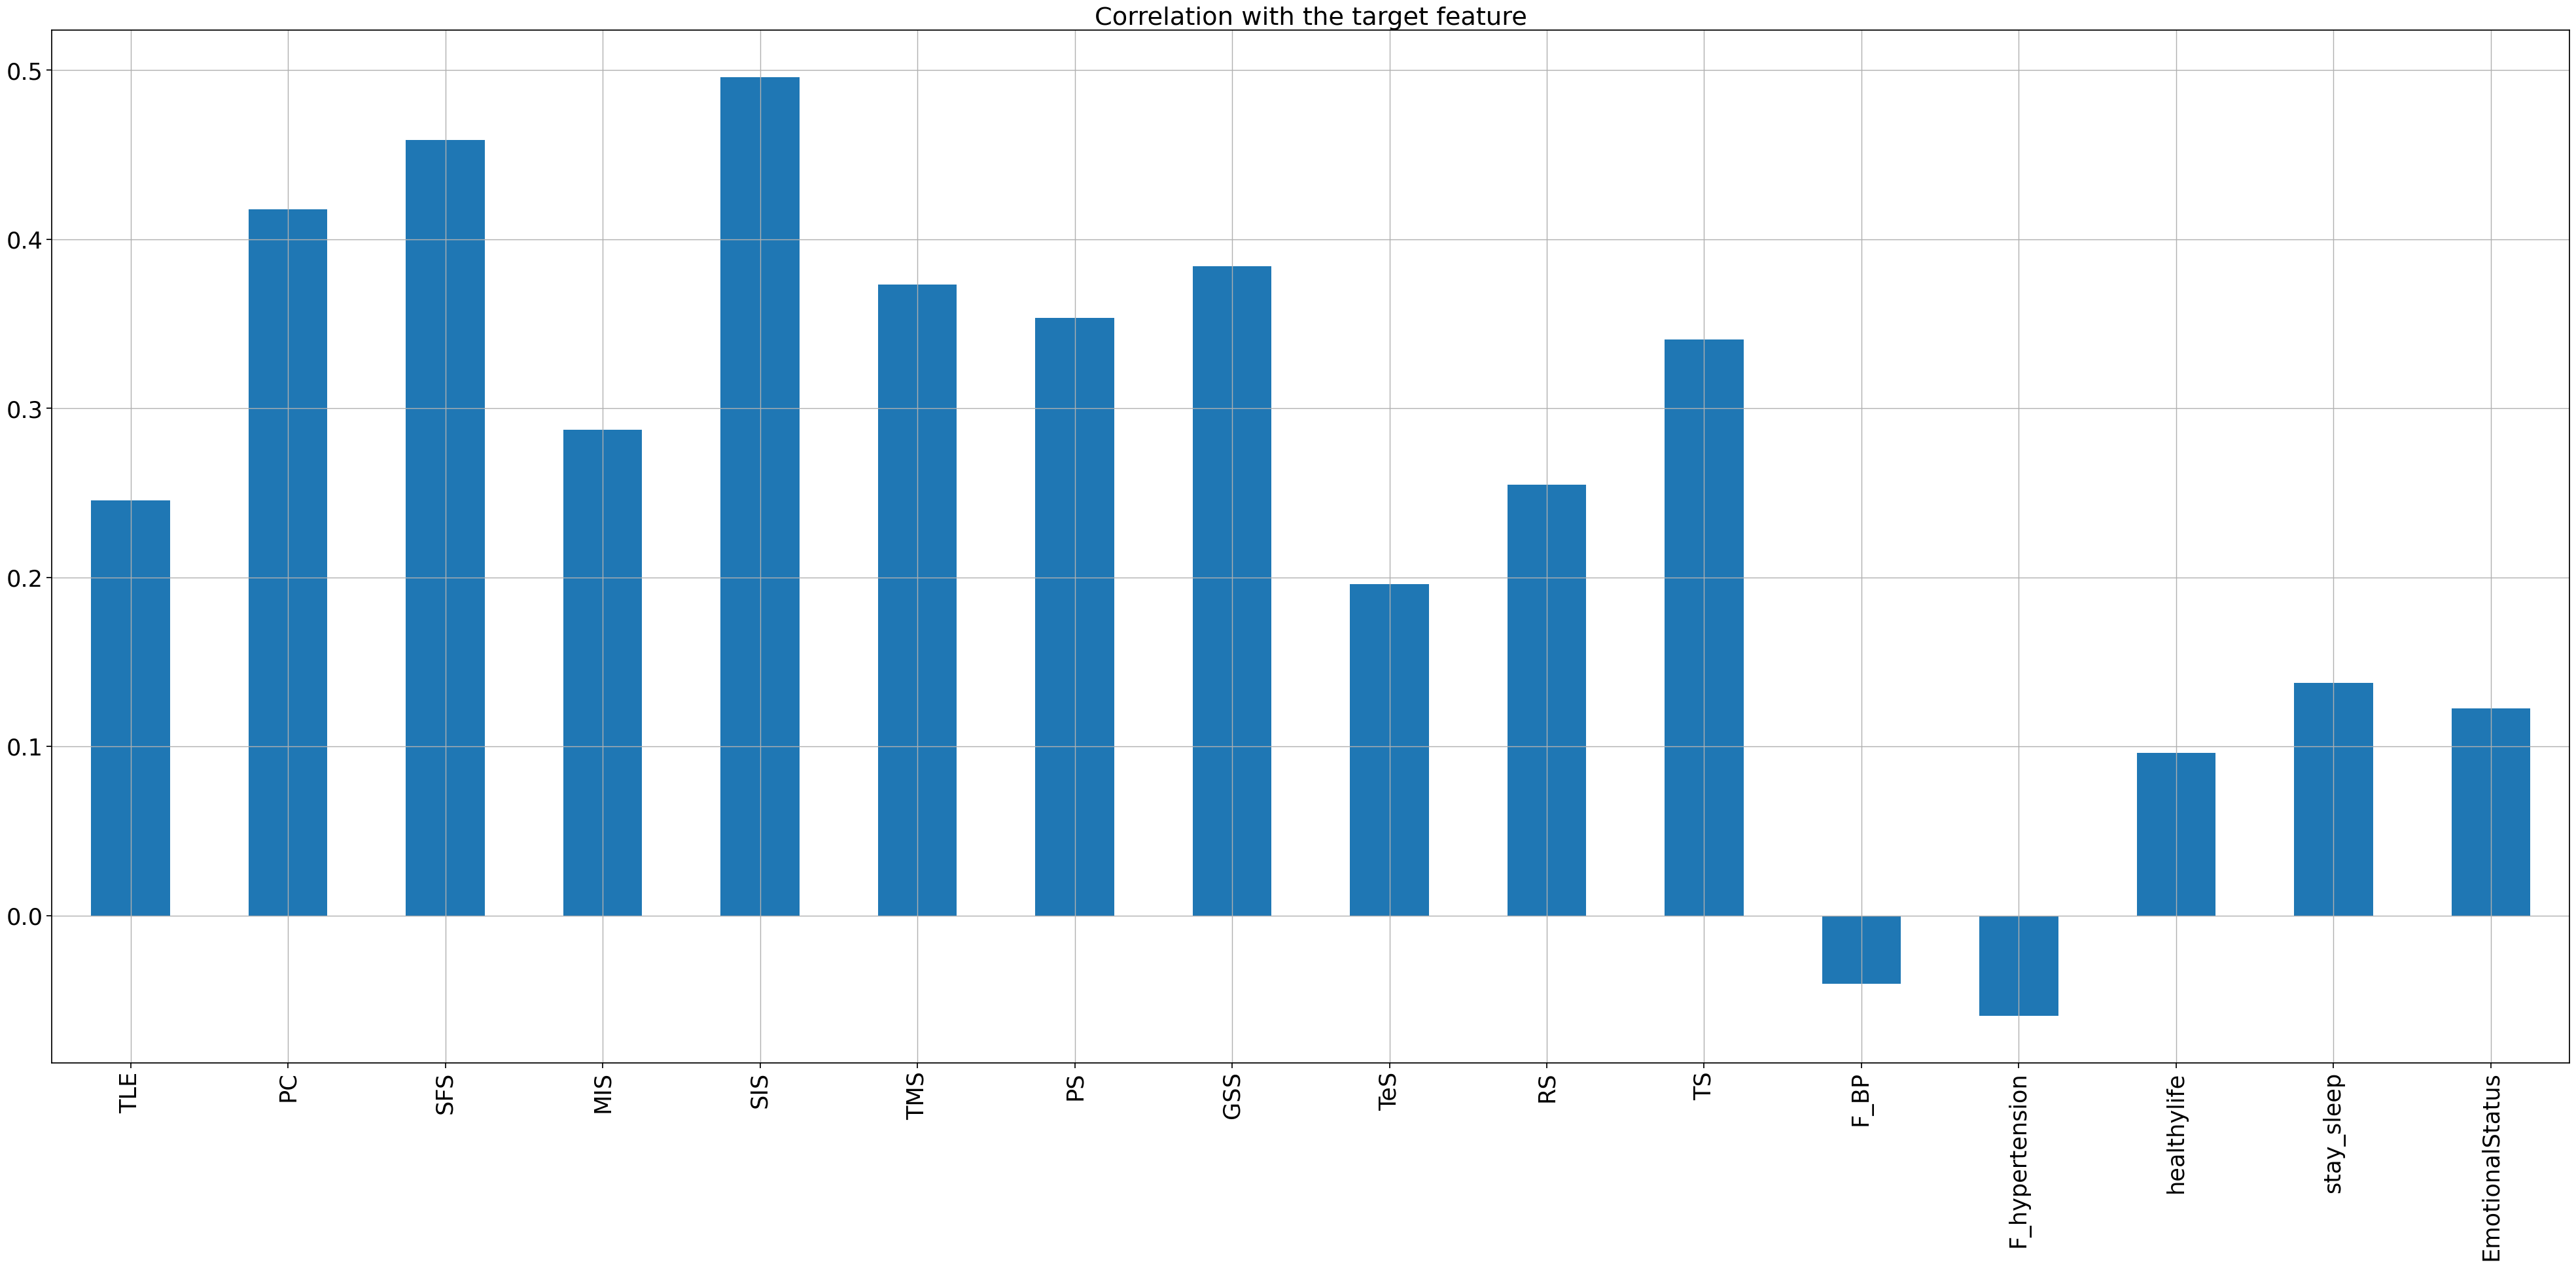

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
modified_data.drop('Burnout', axis=1).corrwith(modified_data.Burnout).plot(kind='bar', grid=True, figsize=(40, 20),
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [ ]:
X = modified_data.drop(['Burnout'], axis=1)

y = modified_data['Burnout']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape


((7980, 16), (3421, 16))

In [ ]:
one_hot_encoded_training_predictors = pd.get_dummies(X_train)

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

#**Apply Model**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

#**Logistic Regression**


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.99%
_______________________________________________
CLASSIFICATION REPORT:
                   -3    -2          -1            0           1           2  \
precision    0.666667   0.0    0.112903     0.775413    0.710744    0.971429   
recall       0.059406   0.0    0.011309     0.996188    0.088935    0.209877   
f1-score     0.109091   0.0    0.020558     0.872044    0.158088    0.345178   
support    101.000000  97.0  619.000000  6034.000000  967.000000  162.000000   

           accuracy    macro avg  weighted avg  
precision  0.769925     0.539526      0.709364  
recall     0.769925     0.227619      0.769925  
f1-score   0.769925     0.250826      0.688527  
support    0.769925  7980.000000   7980.000000  
_______________________________________________
Confusion Matrix: 
 [[   6    1   38   56    0    0]
 [   2    0   13   82    0    0]
 [   0    0    7  612    0    0]
 [   1    0    2 6011   19    1]
 [   0    0    1  880   86    0]
 [   0    0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                         columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632


**Generate learning curve of LogisticRegression**


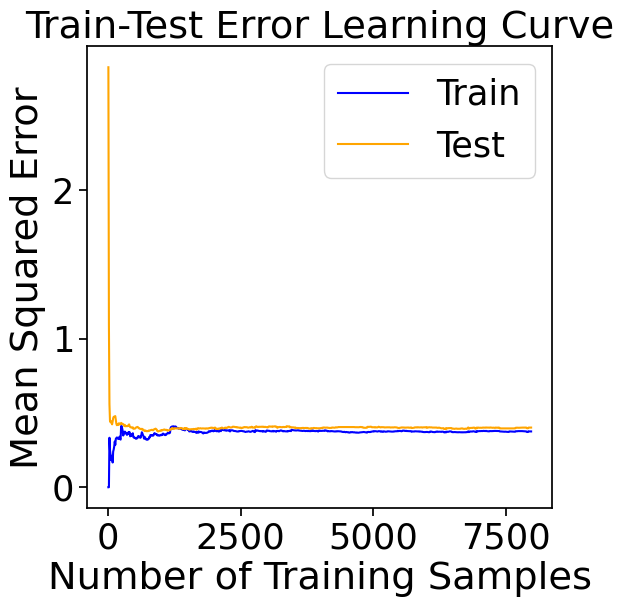

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        scores = classifier.score(X_train, y_train)
        label = "Train"
    else:
        scores = classifier.score(X_test, y_test)
        label = "Test"

    print(f"{label} score: {scores}")
    return scores



# Generate learning curve
train_errors = []
test_errors = []
num_samples = range(10, len(X_train), 10)  # Vary the number of training samples

for num in num_samples:
    lr_clf.fit(X_train[:num], y_train[:num])

    # Calculate train and test errors
    train_pred = lr_clf.predict(X_train[:num])
    train_error = mean_squared_error(y_train[:num], train_pred)
    train_errors.append(train_error)

    test_pred = lr_clf.predict(X_test)
    test_error = mean_squared_error(y_test, test_pred)
    test_errors.append(test_error)

# Set the graph size
plt.figure(figsize=(6, 6))

# Plotting the learning curve
plt.plot(num_samples, train_errors, color='blue', label='Train')
plt.plot(num_samples, test_errors, color='orange', label='Test')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Train-Test Error Learning Curve')
plt.legend()
plt.show()


# **Random Forest classifier model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train score: 0.9774436090225563
Test score: 0.7737503653902368


0.7737503653902368

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-105-02147284a68a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037


Train score: 0.9774436090225563
Test score: 0.7737503653902368


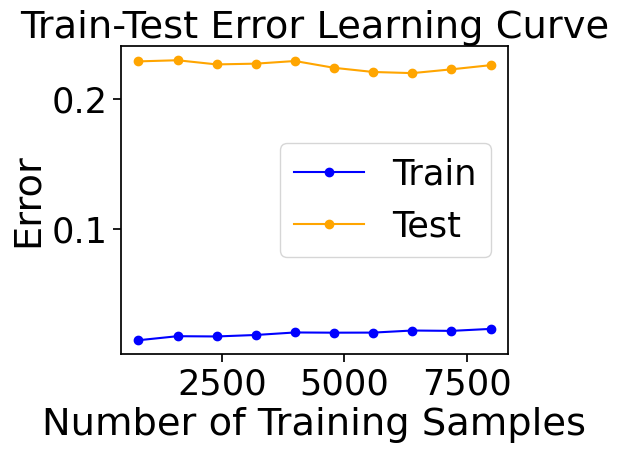

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        scores = classifier.score(X_train, y_train)
        label = "Train"
    else:
        scores = classifier.score(X_test, y_test)
        label = "Test"

    print(f"{label} score: {scores}")
    return scores

# Create and train the random forest classifier
rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

# Calculate and print the train and test scores
train_score = print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
test_score = print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

# Generate train-test error learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
test_errors = []

for train_size in train_sizes:
    # Calculate the number of training samples based on the train_size
    num_train_samples = int(train_size * len(X_train))
    X_train_subset = X_train[:num_train_samples]
    y_train_subset = y_train[:num_train_samples]

    # Create and train a new random forest classifier
    rf_clf_subset = RandomForestClassifier(n_estimators=1000, random_state=42)
    rf_clf_subset.fit(X_train_subset, y_train_subset)

    # Calculate and store the train and test errors
    train_error = 1 - rf_clf_subset.score(X_train_subset, y_train_subset)
    test_error = 1 - rf_clf_subset.score(X_test, y_test)

    train_errors.append(train_error)
    test_errors.append(test_error)
# Set the graph size
plt.figure(figsize=(5, 4))
# Plotting the train-test error learning curve
plt.plot(train_sizes * len(X_train), train_errors, 'b-o', label='Train')
plt.plot(train_sizes * len(X_train), test_errors, 'orange', marker='o', label='Test')
plt.xlabel("Number of Training Samples")
plt.ylabel("Error")
plt.title("Train-Test Error Learning Curve")
plt.legend()
plt.show()


# **Naive Bayes classifier model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create a Naive Bayes classifier
nb_clf = GaussianNB()

# Fit the classifier to the training data
nb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_clf.predict(X_test)

print_score(nb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(nb_clf, X_train, y_train, X_test, y_test, train=False)


Train score: 0.7422305764411028
Test score: 0.7272727272727273


0.7272727272727273

In [ ]:
test_score = accuracy_score(y_test, nb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, nb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["naive_bayes Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-108-5beea4289943>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273


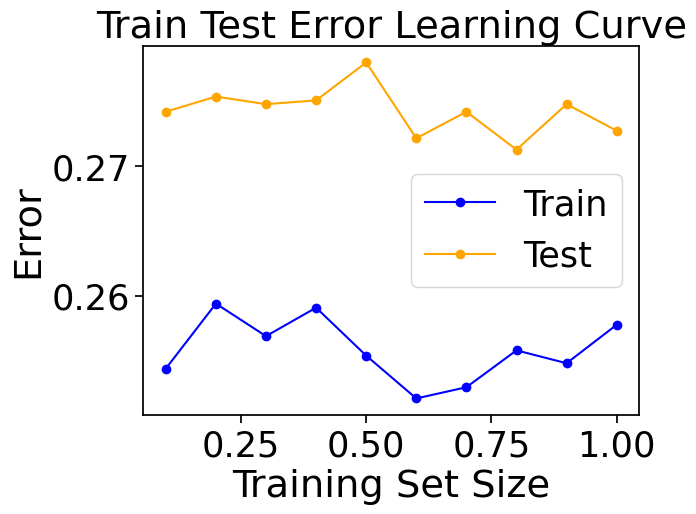

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Create a Naive Bayes classifier
nb_clf = GaussianNB()

# Initialize lists to store training and test errors
train_errors = []
test_errors = []

# Vary the training set size
training_sizes = np.linspace(0.1, 1.0, 10)

# Calculate and print the train and test errors for each training set size
for size in training_sizes:
    # Calculate the index for the current training set size
    idx = int(size * len(X_train))

    # Slice the training set based on the current size
    X_train_subset = X_train[:idx]
    y_train_subset = y_train[:idx]

    # Fit the classifier to the subset of training data
    nb_clf.fit(X_train_subset, y_train_subset)

    # Calculate the train and test errors
    y_pred_train = nb_clf.predict(X_train_subset)
    train_error = 1 - accuracy_score(y_train_subset, y_pred_train)
    y_pred_test = nb_clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_pred_test)

    # Append the errors to the respective lists
    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the Train Test Error Learning Curve
plt.plot(training_sizes, train_errors, marker='o', color='blue', label='Train')
plt.plot(training_sizes, test_errors, marker='o', color='orange', label='Test')
plt.xlabel('Training Set Size')
plt.ylabel('Error')
plt.title('Train Test Error Learning Curve')
plt.legend()
plt.show()


# **KNeighbors Classifier Model**

In [ ]:

from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)


print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train score: 0.8223057644110275
Test score: 0.7757965507161648


0.7757965507161648

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["KNN Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-111-022a61cdbc5a>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655


Train score: 0.8223057644110275
Test score: 0.7757965507161648


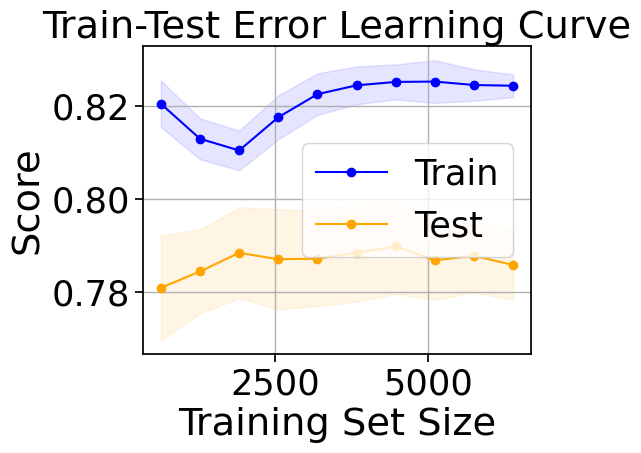

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        scores = classifier.score(X_train, y_train)
        label = "Train"
    else:
        scores = classifier.score(X_test, y_test)
        label = "Test"

    print(f"{label} score: {scores}")
    return scores

# Create a KNN classifier
knn_clf = KNeighborsClassifier()

# Fit the classifier to the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)

# Calculate and print the train and test scores
train_score = print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
test_score = print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    knn_clf, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5
)

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Set the graph size
plt.figure(figsize=(5, 4))
# Plotting the learning curve
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Train")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Test")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Train-Test Error Learning Curve")
plt.legend(loc="best")
plt.grid(True)
plt.show()


# **SVM classifier Model**

In [ ]:

from sklearn.svm import SVC

# Create an SVM classifier
svm_clf = SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_clf.predict(X_test)


print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train score: 0.8387218045112782
Test score: 0.7839812920198772


0.7839812920198772

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["SVM Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-114-d1a6c9812300>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655
4,SVM Classifier,83.872180,78.398129


# **Coefficients**

In [ ]:
from sklearn import svm
import numpy as np

# Assuming you have your independent variables in X and dependent variable in y

# Create and train the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)


Coefficients: [[ 4.65766630e-02 -1.92371066e-01 -4.32788381e-01  5.26547467e-01
  -8.22744840e-01  1.21175582e-01  6.54050690e-02 -4.35427254e-01
   9.38194143e-05 -4.93589670e-01  6.07324021e-01 -1.07949162e-01
   1.07844708e-01  5.95804622e-02 -1.09305018e-04 -1.34532381e-04]
 [-2.12729968e-02 -1.69710656e-01 -4.45457402e-01  5.42477602e-01
  -1.06037207e+00 -1.75710328e-01 -4.98858885e-02  1.33048907e-01
  -2.66776635e-01 -5.07372585e-01  3.82297277e-01 -1.25612938e-02
   6.12485154e-02  6.74608494e-03 -1.25160818e-01 -9.08546900e-02]
 [ 8.80798701e-02 -3.53179938e-01 -4.32528937e-01  4.12542397e-01
  -8.11101162e-01 -1.55398676e-01  9.28962524e-02  4.09801336e-02
  -3.93193998e-01 -3.62911439e-01  2.37848282e-01 -8.19789121e-03
   2.36172039e-02 -4.66834887e-02 -5.64351276e-02 -3.43728721e-02]
 [ 2.92987039e-02 -3.41166930e-01 -5.40396254e-01  2.18918034e-01
  -9.84107181e-01 -1.57930436e-01  1.12640102e-01 -1.79607511e-02
  -4.81854350e-01 -6.55593707e-01  4.10930761e-01  3.382044

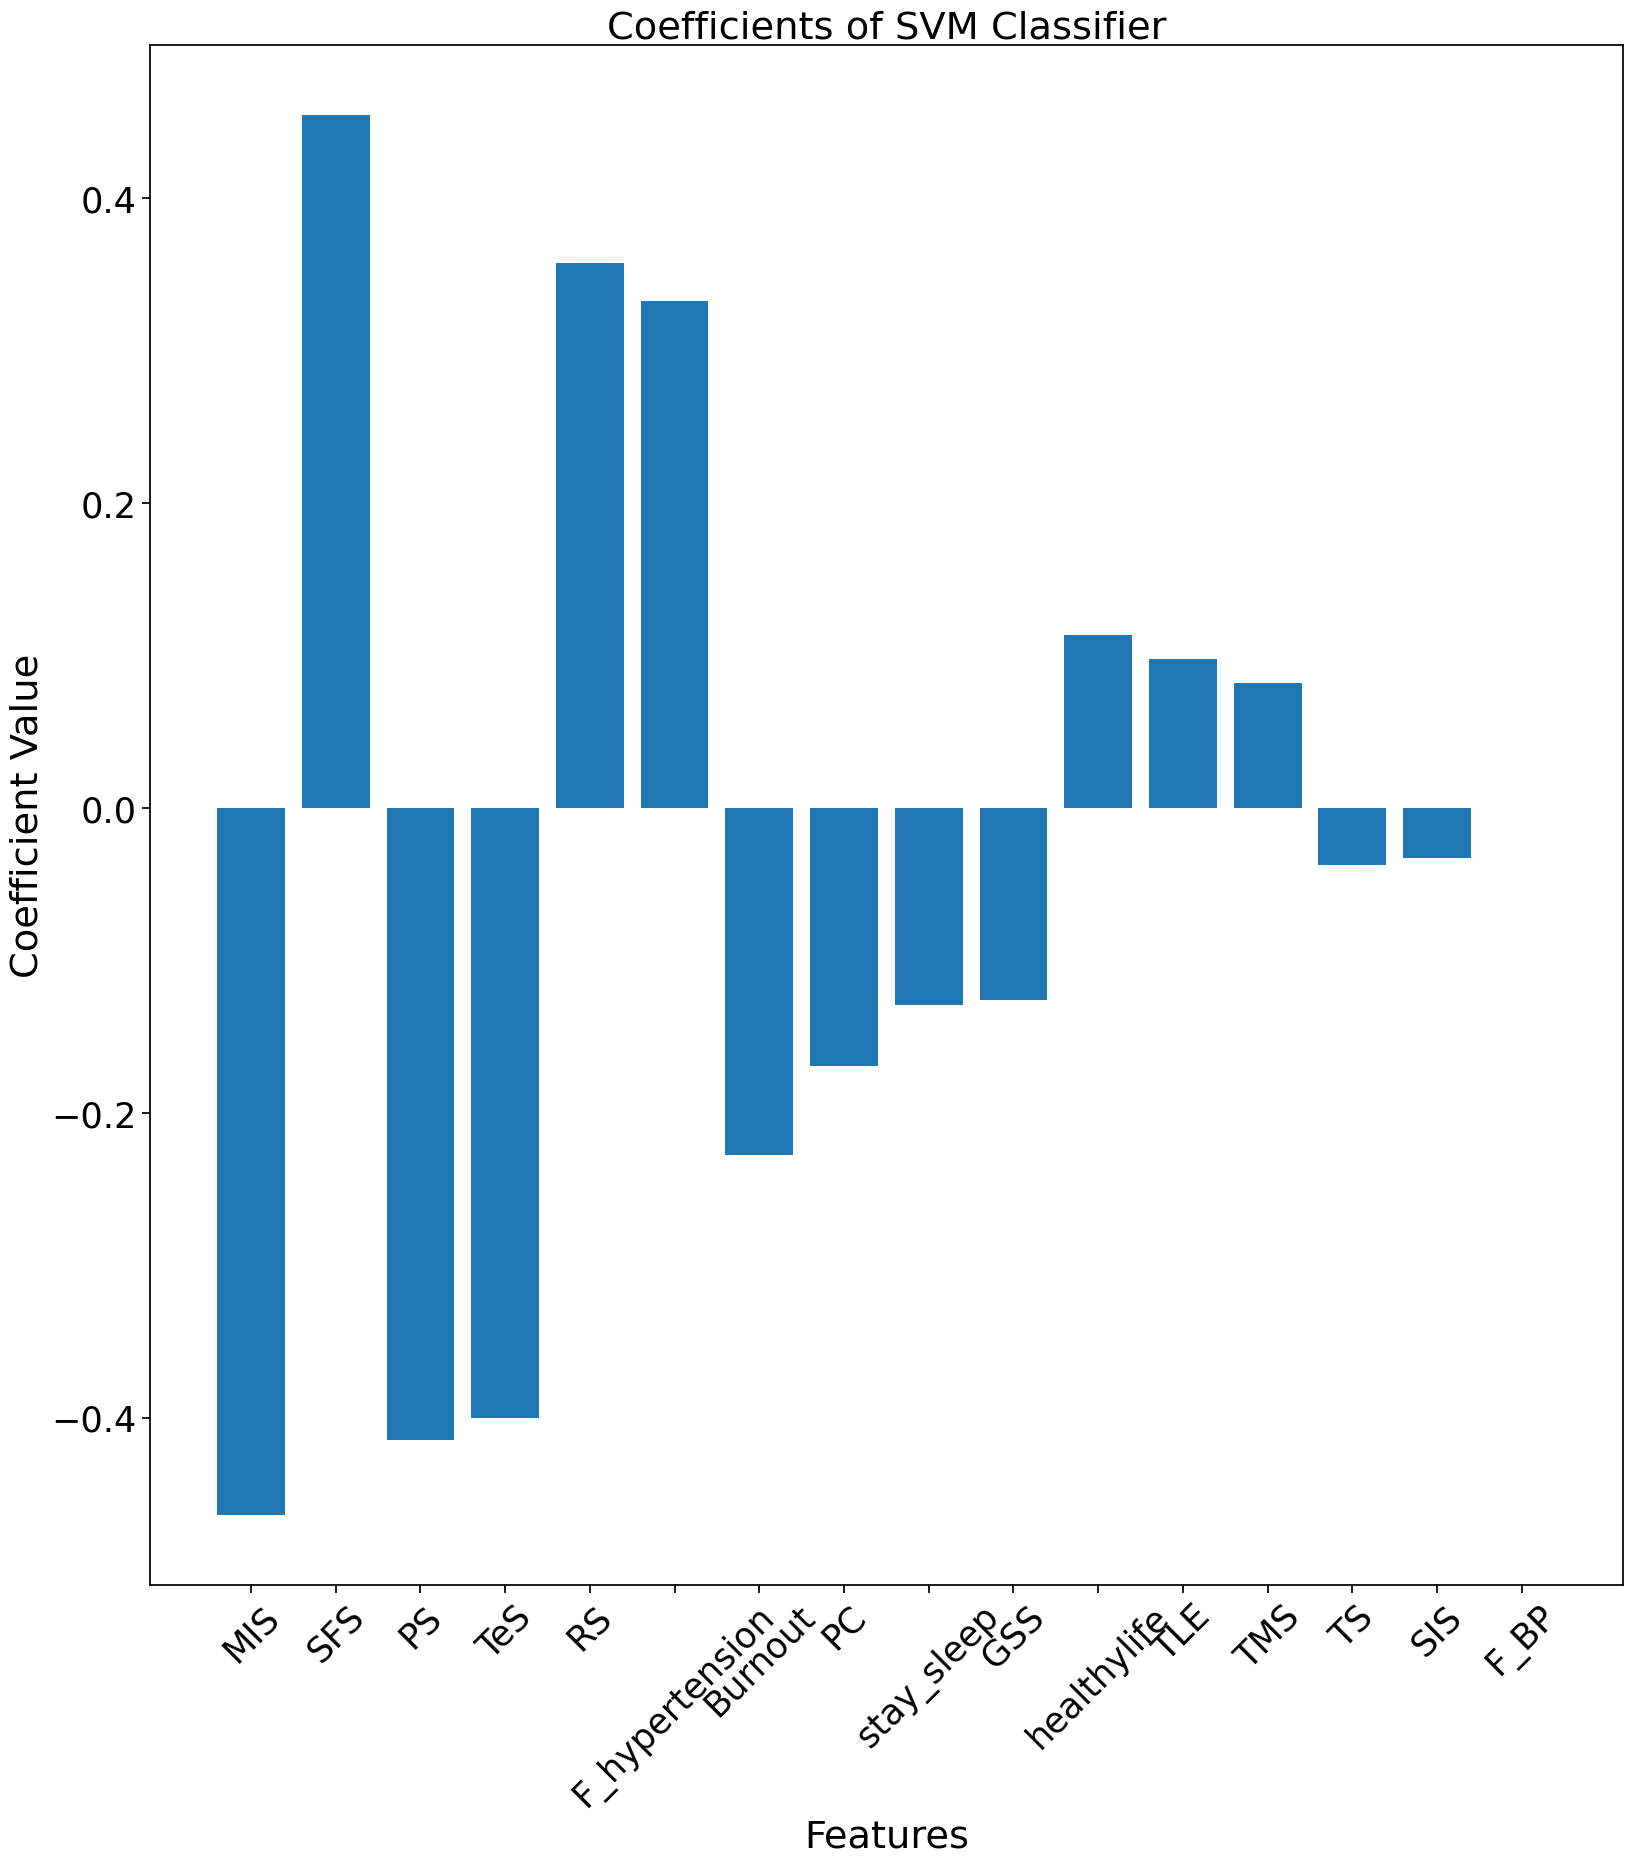

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Update the feature names
feature_names = ['TLE', 'PC', 'Burnout', 'SFS', 'MIS', 'SIS', 'TMS', 'PS', 'GSS', 'TeS', 'RS', 'TS', 'F_BP', 'F_hypertension', 'healthylife','stay_sleep', 'EmotionalStatus']

# Fit the classifier to the training data
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

# Create a dictionary mapping feature names to coefficients
feature_coefficients = {feature: coefficient for feature, coefficient in zip(feature_names, svm_clf.coef_[0])}

# Sort the coefficients by absolute value
sorted_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

# Extract the sorted feature names and coefficients
sorted_feature_names = [item[0] for item in sorted_coefficients]
sorted_coefficients = [item[1] for item in sorted_coefficients]

# Plotting the coefficients
plt.figure(figsize=(19, 20))
plt.bar(sorted_feature_names, sorted_coefficients)
plt.title("Coefficients of SVM Classifier")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()


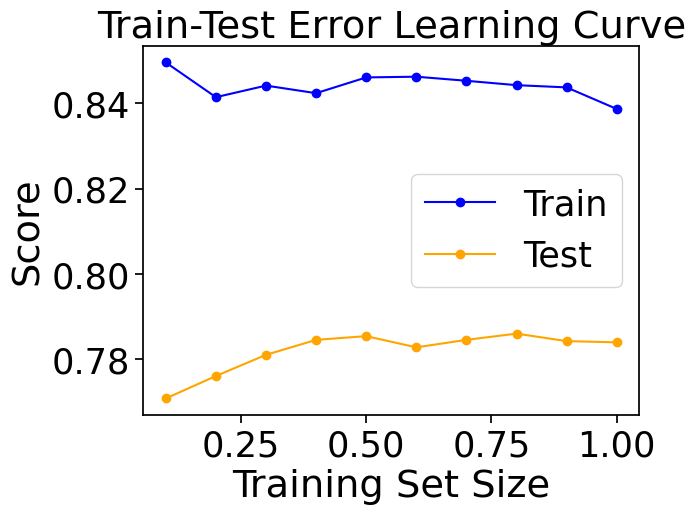

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        scores = classifier.score(X_train, y_train)
        label = "Train"
    else:
        scores = classifier.score(X_test, y_test)
        label = "Test"

    return scores

# Create an SVM classifier
svm_clf = SVC()

# Fit the classifier to the training data
svm_clf.fit(X_train, y_train)

# Lists to store train and test scores
train_scores = []
test_scores = []

# Calculate train and test scores for different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)
for train_size in train_sizes:
    # Calculate the number of samples for the current size
    num_samples = int(train_size * len(X_train))
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]

    # Fit the classifier to the subset of the training data
    svm_clf.fit(X_train_subset, y_train_subset)

    # Calculate and store the train and test scores
    train_score = print_score(svm_clf, X_train_subset, y_train_subset, X_test, y_test, train=True)
    test_score = print_score(svm_clf, X_train_subset, y_train_subset, X_test, y_test, train=False)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plotting the Train-Test Error Learning Curve
plt.plot(train_sizes, train_scores, marker='o', color='blue', label='Train')
plt.plot(train_sizes, test_scores, marker='o', color='orange', label='Test')
plt.xlabel("Training Set Size")
plt.ylabel("Score")
plt.title("Train-Test Error Learning Curve")
plt.legend()
plt.show()


# **Multi-layer Perceptron (MLP) Model**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [ ]:

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=0)

In [ ]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)
print_score(clf, X_train, y_train, X_test, y_test, train=False)


0.7687810581701257

In [ ]:
test_score = accuracy_score(y_test, clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["MLP Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

<ipython-input-121-0ff3e7798d7c>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.992481,76.059632
1,Random forest Classifier,97.744361,77.375037
2,naive_bayes Classifier,74.223058,72.727273
3,KNN Classifier,82.230576,77.579655
4,SVM Classifier,83.872180,78.398129
5,MLP Classifier,84.398496,76.878106


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.15601503759398494
Test error: 0.23121894182987435


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.11027568922305764
Test error: 0.24671148786904418


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.12030075187969924
Test error: 0.23940368313358662


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.1257309941520468
Test error: 0.2370651856182403


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.13377192982456143
Test error: 0.23063431745103768


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.1401002506265664
Test error: 0.23092662964045596


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.13554720133667497
Test error: 0.23092662964045596


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.14142499104905115
Test error: 0.22888044431452792


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.15084586466165417
Test error: 0.22449576147325345


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.14884433305485933
Test error: 0.2291727565039462


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train error: 0.15601503759398494
Test error: 0.23121894182987435


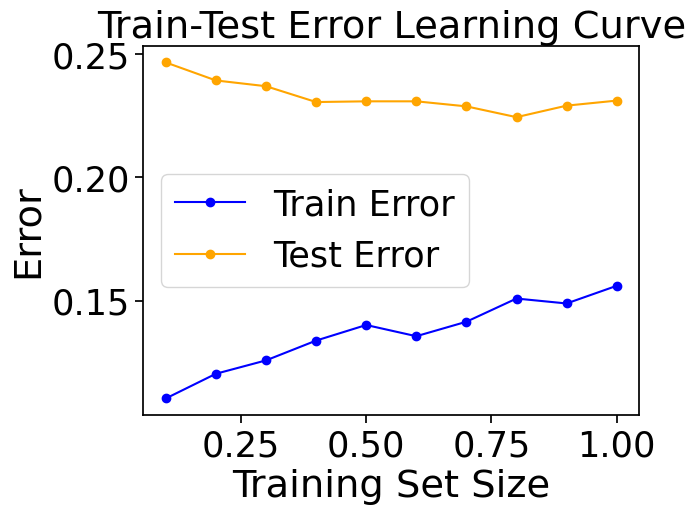

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier

def print_score(classifier, X_train, y_train, X_test, y_test, train=True):
    if train:
        scores = 1 - classifier.score(X_train, y_train)
        label = "Train"
    else:
        scores = 1 - classifier.score(X_test, y_test)
        label = "Test"

    print(f"{label} error: {scores}")
    return scores

# Create and train the MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=0)
clf.fit(X_train, y_train)

# Calculate and print the train and test errors
train_error = print_score(clf, X_train, y_train, X_test, y_test, train=True)
test_error = print_score(clf, X_train, y_train, X_test, y_test, train=False)

# Generate the Train-Test Error Learning Curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
test_errors = []

for train_size in train_sizes:
    subset_index = int(train_size * len(X_train))
    X_subset = X_train[:subset_index]
    y_subset = y_train[:subset_index]

    clf.fit(X_subset, y_subset)
    train_error = print_score(clf, X_subset, y_subset, X_test, y_test, train=True)
    test_error = print_score(clf, X_subset, y_subset, X_test, y_test, train=False)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Plotting the Train-Test Error Learning Curve
plt.plot(train_sizes, train_errors, marker='o', color='blue', label='Train Error')
plt.plot(train_sizes, test_errors, marker='o', color='orange', label='Test Error')
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.title("Train-Test Error Learning Curve")
plt.legend()
plt.show()


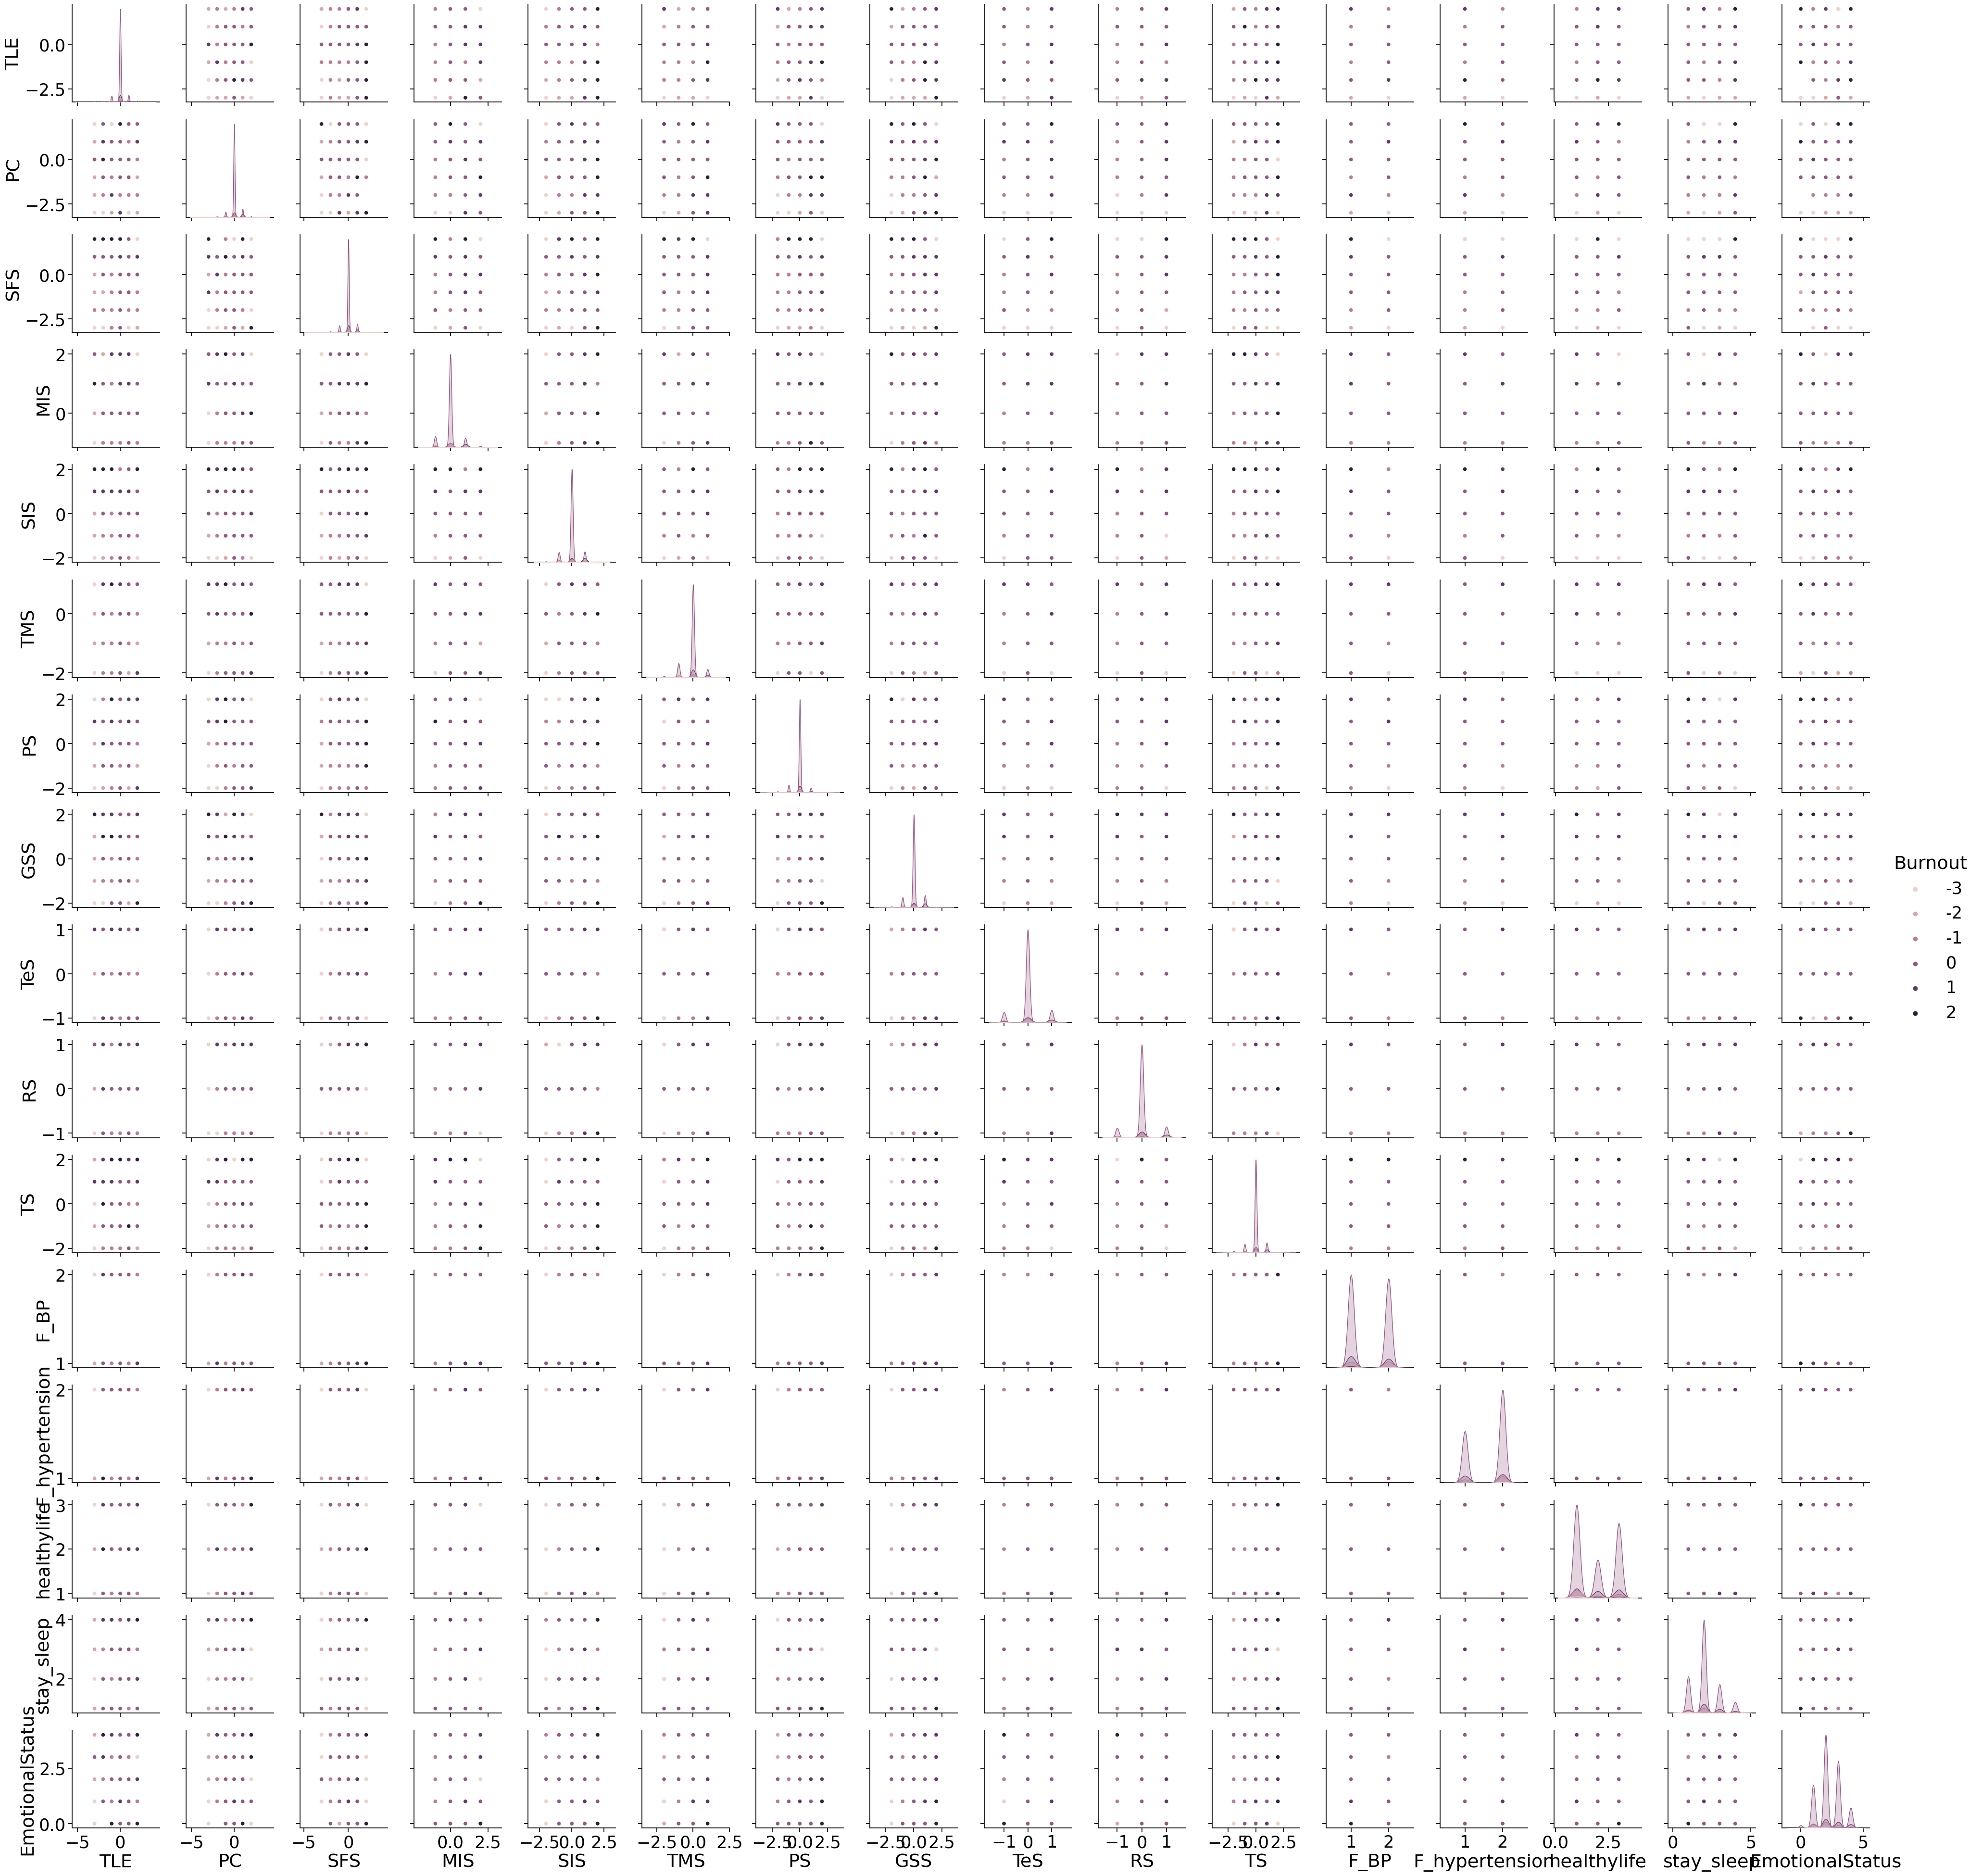

In [ ]:
sns.pairplot(modified_data, hue = 'Burnout')

In [ ]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


# Encode the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the parameters for XGBoost
params = {
    'objective': 'multi:softmax',  # Use softmax for multi-class classification
    'num_class': len(label_encoder.classes_),  # Number of classes in the dataset
    'max_depth': 3,  # Maximum depth of each tree
    'eta': 0.1,  # Learning rate
    'gamma': 0.1,  # Minimum loss reduction required to make further splits
    'min_child_weight': 1,  # Minimum sum of instance weight needed in a child
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7821131082858396


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier()

# Fit the classifier to the training data
gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)


Train error: 0.16655701754385965
Test error: 0.22095572117492324


0.22095572117492324

In [ ]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

test_score

77.90442788250768

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
adaboost_clf = AdaBoostClassifier()

# Fit the classifier to the training data
adaboost_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_clf.predict(X_test)


In [ ]:
adaboost_clf = AdaBoostClassifier()
adaboost_clf.fit(X_train, y_train)
y_pred = adaboost_clf.predict(X_test)


In [ ]:
test_score = accuracy_score(y_test, adaboost_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, adaboost_clf.predict(X_train)) * 100

test_score

75.49320473476546

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Create a HistGradientBoostingClassifier
hist_gb_clf = HistGradientBoostingClassifier()

# Fit the classifier to the training data
hist_gb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = hist_gb_clf.predict(X_test)


In [ ]:
test_score = accuracy_score(y_test, hist_gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, hist_gb_clf.predict(X_train)) * 100

test_score

77.0714598860149

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Create a Passive Aggressive classifier
pa_clf = PassiveAggressiveClassifier()

# Fit the classifier to the training data
pa_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pa_clf.predict(X_test)




74.57255589653661

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Create a Ridge classifier
ridge_clf = RidgeClassifier()

# Fit the classifier to the training data
ridge_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge_clf.predict(X_test)

test_score = accuracy_score(y_test, ridge_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ridge_clf.predict(X_train)) * 100

test_score


73.82726874177992

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# Create an Extra Trees classifier
extra_trees_clf = ExtraTreesClassifier()

# Fit the classifier to the training data
extra_trees_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = extra_trees_clf.predict(X_test)
test_score = accuracy_score(y_test, extra_trees_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, extra_trees_clf.predict(X_train)) * 100

test_score

75.53704515563349

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA classifier
lda_clf = LinearDiscriminantAnalysis()

# Fit the classifier to the training data
lda_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lda_clf.predict(X_test)

test_score = accuracy_score(y_test, lda_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lda_clf.predict(X_train)) * 100

test_score


77.15914072775098

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a QDA classifier
qda_clf = QuadraticDiscriminantAnalysis()

# Fit the classifier to the training data
qda_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = qda_clf.predict(X_test)

test_score = accuracy_score(y_test, qda_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, qda_clf.predict(X_train)) * 100

test_score


73.60806663743972

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the number of classes in your dataset
num_classes = 10  # Replace with the actual number of classes

# Create a CNN model
model = tf.keras.Sequential()
model.add(layers.Reshape((16, 1), input_shape=(16,)))
model.add(layers.Conv1D(32, 3, activation='relu'))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Reshape the input data
X_train_reshaped = X_train.to_numpy().reshape(-1, 16)
X_test_reshaped = X_test.to_numpy().reshape(-1, 16)

# Fit the model to the training data
model.fit(X_train_reshaped, y_train, epochs=40, validation_data=(X_test_reshaped, y_test))

# Make predictions on the test data
y_pred = model.predict(X_test_reshaped)


Epoch 1/40
285/285 [==============================] - 3s 6ms/step - loss: 0.7932 - accuracy: 0.7582 - val_loss: 0.6564 - val_accuracy: 0.7672
Epoch 2/40
285/285 [==============================] - 1s 4ms/step - loss: 0.6132 - accuracy: 0.7863 - val_loss: 0.6359 - val_accuracy: 0.7738
Epoch 3/40
285/285 [==============================] - 1s 5ms/step - loss: 0.5933 - accuracy: 0.7916 - val_loss: 0.6316 - val_accuracy: 0.7755
Epoch 4/40
285/285 [==============================] - 1s 5ms/step - loss: 0.5816 - accuracy: 0.7941 - val_loss: 0.6410 - val_accuracy: 0.7751
Epoch 5/40
285/285 [==============================] - 1s 3ms/step - loss: 0.5765 - accuracy: 0.7961 - val_loss: 0.6240 - val_accuracy: 0.7782
Epoch 6/40
285/285 [==============================] - 1s 3ms/step - loss: 0.5689 - accuracy: 0.7965 - val_loss: 0.6516 - val_accuracy: 0.7747
Epoch 7/40
285/285 [==============================] - 1s 4ms/step - loss: 0.5682 - accuracy: 0.7974 - val_loss: 0.6386 - val_accuracy: 0.7720
Epoch 

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a Bagging classifier
bag_clf = BaggingClassifier()

# Fit the classifier to the training data
bag_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bag_clf.predict(X_test)

test_score = accuracy_score(y_test, bag_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, bag_clf.predict(X_train)) * 100

test_score


72.73125822007891